![](img/image.png)


# Прогнозирование направления изменения курса доллара США в российских рублях (USD/RUB) на один день вперед.

Исходные данные: курс валютной пары USD/RUB, индекс ММВБ и цена фьючерса на нефть марки «Brent» (дневные данные).

### Гипотеза.
Изменение цены одного из основных сырьевых ресурсов РФ, состояние фондового рынка и движение цены доллара США за прошедшие периоды содержат в себе информацию о будущем изменении курса USD/RUB.

In [1]:
import pandas as pd

In [2]:
# Загружаем данные индекса ММВБ
moex = pd.read_csv('MOEX.csv')
moex = moex.drop(['Vol.', 'Change %'], axis=1)
moex

Date     Price      Open      High       Low
0     Mar 17, 2021  3,541.65  3,579.06  3,586.87  3,540.32
1     Mar 16, 2021  3,589.83  3,600.68  3,602.18  3,544.29
2     Mar 15, 2021  3,584.49  3,562.69  3,596.31  3,558.62
3     Mar 12, 2021  3,539.50  3,515.44  3,539.50  3,502.37
4     Mar 11, 2021  3,508.51  3,481.26  3,508.51  3,472.40
...            ...       ...       ...       ...       ...
1556  Jan 12, 2015  1,513.22  1,515.23  1,534.49  1,503.60
1557  Jan 09, 2015  1,515.37  1,547.61  1,557.83  1,496.18
1558  Jan 08, 2015  1,547.39  1,482.12  1,564.76  1,482.12
1559  Jan 06, 2015  1,480.73  1,435.39  1,481.30  1,430.69
1560  Jan 05, 2015  1,435.66  1,394.66  1,438.86  1,390.62

[1561 rows x 5 columns]

In [3]:
moex.columns = ['Date', 'Close_moex', 'Open_moex', 'High_moex', 'Low_moex']
moex

Date Close_moex Open_moex High_moex  Low_moex
0     Mar 17, 2021   3,541.65  3,579.06  3,586.87  3,540.32
1     Mar 16, 2021   3,589.83  3,600.68  3,602.18  3,544.29
2     Mar 15, 2021   3,584.49  3,562.69  3,596.31  3,558.62
3     Mar 12, 2021   3,539.50  3,515.44  3,539.50  3,502.37
4     Mar 11, 2021   3,508.51  3,481.26  3,508.51  3,472.40
...            ...        ...       ...       ...       ...
1556  Jan 12, 2015   1,513.22  1,515.23  1,534.49  1,503.60
1557  Jan 09, 2015   1,515.37  1,547.61  1,557.83  1,496.18
1558  Jan 08, 2015   1,547.39  1,482.12  1,564.76  1,482.12
1559  Jan 06, 2015   1,480.73  1,435.39  1,481.30  1,430.69
1560  Jan 05, 2015   1,435.66  1,394.66  1,438.86  1,390.62

[1561 rows x 5 columns]

In [4]:
# Загружаем данные индекса курса валюты

usd_rub = pd.read_csv('USD_RUB.csv')
usd_rub = usd_rub.drop(['Change %'], axis=1)
usd_rub

Date    Price     Open     High      Low
0     Mar 17, 2021  73.0748  72.8728  73.1595  72.8500
1     Mar 16, 2021  72.8728  72.8170  73.0556  72.5404
2     Mar 15, 2021  72.8170  73.3335  73.4717  72.8170
3     Mar 12, 2021  73.3335  73.3037  73.7261  73.2349
4     Mar 11, 2021  73.3037  73.6031  73.8572  73.1938
...            ...      ...      ...      ...      ...
1568  Jan 09, 2015  61.4457  60.3831  62.1110  59.7894
1569  Jan 08, 2015  60.3831  63.0892  63.0892  59.6345
1570  Jan 07, 2015  62.9000  63.7300  64.1450  62.0550
1571  Jan 06, 2015  63.0892  60.8074  64.0949  60.5253
1572  Jan 05, 2015  60.8074  55.9077  61.1490  55.9077

[1573 rows x 5 columns]

In [5]:
usd_rub.columns = ['Date', 'Close_currency',
                   'Open_currency', 'High_currency', 'Low_currency']
usd_rub

Date  Close_currency  Open_currency  High_currency  Low_currency
0     Mar 17, 2021         73.0748        72.8728        73.1595       72.8500
1     Mar 16, 2021         72.8728        72.8170        73.0556       72.5404
2     Mar 15, 2021         72.8170        73.3335        73.4717       72.8170
3     Mar 12, 2021         73.3335        73.3037        73.7261       73.2349
4     Mar 11, 2021         73.3037        73.6031        73.8572       73.1938
...            ...             ...            ...            ...           ...
1568  Jan 09, 2015         61.4457        60.3831        62.1110       59.7894
1569  Jan 08, 2015         60.3831        63.0892        63.0892       59.6345
1570  Jan 07, 2015         62.9000        63.7300        64.1450       62.0550
1571  Jan 06, 2015         63.0892        60.8074        64.0949       60.5253
1572  Jan 05, 2015         60.8074        55.9077        61.1490       55.9077

[1573 rows x 5 columns]

In [6]:
# Загружаем данные цены фьючерса нефти

brent = pd.read_csv('Brent.csv')
brent = brent.drop(['Change %'], axis=1)
brent

Date  Price   Open   High    Low     Vol.
0     Mar 17, 2021  68.09  68.52  68.87  68.01        -
1     Mar 16, 2021  68.39  68.81  68.94  67.36  248.99K
2     Mar 15, 2021  68.88  69.08  70.03  67.82  262.60K
3     Mar 12, 2021  69.22  69.59  69.90  69.03  251.54K
4     Mar 11, 2021  69.63  68.45  69.84  67.99  289.61K
...            ...    ...    ...    ...    ...      ...
1595  Jan 09, 2015  50.11  51.25  51.44  48.90  285.72K
1596  Jan 08, 2015  50.96  51.06  51.91  49.81  243.42K
1597  Jan 07, 2015  51.15  51.15  51.84  49.66  318.28K
1598  Jan 06, 2015  51.10  53.20  53.60  50.52  338.88K
1599  Jan 05, 2015  53.11  56.25  56.30  52.66  289.89K

[1600 rows x 6 columns]

In [7]:
brent.columns = ['Date', 'Close_brent', 'Open_brent',
                 'High_brent', 'Low_brent', 'Vol_brent']
brent

Date  Close_brent  Open_brent  High_brent  Low_brent Vol_brent
0     Mar 17, 2021        68.09       68.52       68.87      68.01         -
1     Mar 16, 2021        68.39       68.81       68.94      67.36   248.99K
2     Mar 15, 2021        68.88       69.08       70.03      67.82   262.60K
3     Mar 12, 2021        69.22       69.59       69.90      69.03   251.54K
4     Mar 11, 2021        69.63       68.45       69.84      67.99   289.61K
...            ...          ...         ...         ...        ...       ...
1595  Jan 09, 2015        50.11       51.25       51.44      48.90   285.72K
1596  Jan 08, 2015        50.96       51.06       51.91      49.81   243.42K
1597  Jan 07, 2015        51.15       51.15       51.84      49.66   318.28K
1598  Jan 06, 2015        51.10       53.20       53.60      50.52   338.88K
1599  Jan 05, 2015        53.11       56.25       56.30      52.66   289.89K

[1600 rows x 6 columns]

In [8]:
# Объединяем данные по дате

moex_and_usdrub = moex.merge(usd_rub, on='Date', how='inner')
moex_and_usdrub

Date Close_moex Open_moex High_moex  Low_moex  Close_currency  \
0     Mar 17, 2021   3,541.65  3,579.06  3,586.87  3,540.32         73.0748   
1     Mar 16, 2021   3,589.83  3,600.68  3,602.18  3,544.29         72.8728   
2     Mar 15, 2021   3,584.49  3,562.69  3,596.31  3,558.62         72.8170   
3     Mar 12, 2021   3,539.50  3,515.44  3,539.50  3,502.37         73.3335   
4     Mar 11, 2021   3,508.51  3,481.26  3,508.51  3,472.40         73.3037   
...            ...        ...       ...       ...       ...             ...   
1556  Jan 12, 2015   1,513.22  1,515.23  1,534.49  1,503.60         63.1624   
1557  Jan 09, 2015   1,515.37  1,547.61  1,557.83  1,496.18         61.4457   
1558  Jan 08, 2015   1,547.39  1,482.12  1,564.76  1,482.12         60.3831   
1559  Jan 06, 2015   1,480.73  1,435.39  1,481.30  1,430.69         63.0892   
1560  Jan 05, 2015   1,435.66  1,394.66  1,438.86  1,390.62         60.8074   

      Open_currency  High_currency  Low_currency  
0           72.8728        73.1595       72.8500  
1           72.8170        73.0556       72.5404  
2           73.3335        73.4717       72.8170  
3           73.3037        73.7261       73.2349  
4           73.6031        73.8572       73.1938  
...             ...            ...           ...  
1556        61.4457        63.4476       61.4457  
1557        60.3831        62.1110       59.7894  
1558        63.0892        63.0892       59.6345  
1559        60.8074        64.0949       60.5253  
1560        55.9077        61.1490       55.9077  

[1561 rows x 9 columns]

In [9]:
# Продолжаем объединять данные в одну табличку

all_data = moex_and_usdrub.merge(brent, on='Date', how='inner')
all_data

Date Close_moex Open_moex High_moex  Low_moex  Close_currency  \
0     Mar 17, 2021   3,541.65  3,579.06  3,586.87  3,540.32         73.0748   
1     Mar 16, 2021   3,589.83  3,600.68  3,602.18  3,544.29         72.8728   
2     Mar 15, 2021   3,584.49  3,562.69  3,596.31  3,558.62         72.8170   
3     Mar 12, 2021   3,539.50  3,515.44  3,539.50  3,502.37         73.3335   
4     Mar 11, 2021   3,508.51  3,481.26  3,508.51  3,472.40         73.3037   
...            ...        ...       ...       ...       ...             ...   
1539  Jan 12, 2015   1,513.22  1,515.23  1,534.49  1,503.60         63.1624   
1540  Jan 09, 2015   1,515.37  1,547.61  1,557.83  1,496.18         61.4457   
1541  Jan 08, 2015   1,547.39  1,482.12  1,564.76  1,482.12         60.3831   
1542  Jan 06, 2015   1,480.73  1,435.39  1,481.30  1,430.69         63.0892   
1543  Jan 05, 2015   1,435.66  1,394.66  1,438.86  1,390.62         60.8074   

      Open_currency  High_currency  Low_currency  Close_brent  Open_brent  \
0           72.8728        73.1595       72.8500        68.09       68.52   
1           72.8170        73.0556       72.5404        68.39       68.81   
2           73.3335        73.4717       72.8170        68.88       69.08   
3           73.3037        73.7261       73.2349        69.22       69.59   
4           73.6031        73.8572       73.1938        69.63       68.45   
...             ...            ...           ...          ...         ...   
1539        61.4457        63.4476       61.4457        47.43       49.93   
1540        60.3831        62.1110       59.7894        50.11       51.25   
1541        63.0892        63.0892       59.6345        50.96       51.06   
1542        60.8074        64.0949       60.5253        51.10       53.20   
1543        55.9077        61.1490       55.9077        53.11       56.25   

      High_brent  Low_brent Vol_brent  
0          68.87      68.01         -  
1          68.94      67.36   248.99K  
2          70.03      67.82   262.60K  
3          69.90      69.03   251.54K  
4          69.84      67.99   289.61K  
...          ...        ...       ...  
1539       49.98      47.16   223.92K  
1540       51.44      48.90   285.72K  
1541       51.91      49.81   243.42K  
1542       53.60      50.52   338.88K  
1543       56.30      52.66   289.89K  

[1544 rows x 14 columns]

Получаю дополнительную информацию из данных, а именно, день недели.

In [10]:
# Переводим данные в объект даты

all_data['Date'] = pd.to_datetime(all_data['Date'])

In [11]:
all_data

Date Close_moex Open_moex High_moex  Low_moex  Close_currency  \
0    2021-03-17   3,541.65  3,579.06  3,586.87  3,540.32         73.0748   
1    2021-03-16   3,589.83  3,600.68  3,602.18  3,544.29         72.8728   
2    2021-03-15   3,584.49  3,562.69  3,596.31  3,558.62         72.8170   
3    2021-03-12   3,539.50  3,515.44  3,539.50  3,502.37         73.3335   
4    2021-03-11   3,508.51  3,481.26  3,508.51  3,472.40         73.3037   
...         ...        ...       ...       ...       ...             ...   
1539 2015-01-12   1,513.22  1,515.23  1,534.49  1,503.60         63.1624   
1540 2015-01-09   1,515.37  1,547.61  1,557.83  1,496.18         61.4457   
1541 2015-01-08   1,547.39  1,482.12  1,564.76  1,482.12         60.3831   
1542 2015-01-06   1,480.73  1,435.39  1,481.30  1,430.69         63.0892   
1543 2015-01-05   1,435.66  1,394.66  1,438.86  1,390.62         60.8074   

      Open_currency  High_currency  Low_currency  Close_brent  Open_brent  \
0           72.8728        73.1595       72.8500        68.09       68.52   
1           72.8170        73.0556       72.5404        68.39       68.81   
2           73.3335        73.4717       72.8170        68.88       69.08   
3           73.3037        73.7261       73.2349        69.22       69.59   
4           73.6031        73.8572       73.1938        69.63       68.45   
...             ...            ...           ...          ...         ...   
1539        61.4457        63.4476       61.4457        47.43       49.93   
1540        60.3831        62.1110       59.7894        50.11       51.25   
1541        63.0892        63.0892       59.6345        50.96       51.06   
1542        60.8074        64.0949       60.5253        51.10       53.20   
1543        55.9077        61.1490       55.9077        53.11       56.25   

      High_brent  Low_brent Vol_brent  
0          68.87      68.01         -  
1          68.94      67.36   248.99K  
2          70.03      67.82   262.60K  
3          69.90      69.03   251.54K  
4          69.84      67.99   289.61K  
...          ...        ...       ...  
1539       49.98      47.16   223.92K  
1540       51.44      48.90   285.72K  
1541       51.91      49.81   243.42K  
1542       53.60      50.52   338.88K  
1543       56.30      52.66   289.89K  

[1544 rows x 14 columns]

In [12]:
# Вытаскиваем еще полезные данные из даты, добавляем день недели в таблицу.

all_data['day_of_week'] = all_data.Date.dt.dayofweek
all_data

Date Close_moex Open_moex High_moex  Low_moex  Close_currency  \
0    2021-03-17   3,541.65  3,579.06  3,586.87  3,540.32         73.0748   
1    2021-03-16   3,589.83  3,600.68  3,602.18  3,544.29         72.8728   
2    2021-03-15   3,584.49  3,562.69  3,596.31  3,558.62         72.8170   
3    2021-03-12   3,539.50  3,515.44  3,539.50  3,502.37         73.3335   
4    2021-03-11   3,508.51  3,481.26  3,508.51  3,472.40         73.3037   
...         ...        ...       ...       ...       ...             ...   
1539 2015-01-12   1,513.22  1,515.23  1,534.49  1,503.60         63.1624   
1540 2015-01-09   1,515.37  1,547.61  1,557.83  1,496.18         61.4457   
1541 2015-01-08   1,547.39  1,482.12  1,564.76  1,482.12         60.3831   
1542 2015-01-06   1,480.73  1,435.39  1,481.30  1,430.69         63.0892   
1543 2015-01-05   1,435.66  1,394.66  1,438.86  1,390.62         60.8074   

      Open_currency  High_currency  Low_currency  Close_brent  Open_brent  \
0           72.8728        73.1595       72.8500        68.09       68.52   
1           72.8170        73.0556       72.5404        68.39       68.81   
2           73.3335        73.4717       72.8170        68.88       69.08   
3           73.3037        73.7261       73.2349        69.22       69.59   
4           73.6031        73.8572       73.1938        69.63       68.45   
...             ...            ...           ...          ...         ...   
1539        61.4457        63.4476       61.4457        47.43       49.93   
1540        60.3831        62.1110       59.7894        50.11       51.25   
1541        63.0892        63.0892       59.6345        50.96       51.06   
1542        60.8074        64.0949       60.5253        51.10       53.20   
1543        55.9077        61.1490       55.9077        53.11       56.25   

      High_brent  Low_brent Vol_brent  day_of_week  
0          68.87      68.01         -            2  
1          68.94      67.36   248.99K            1  
2          70.03      67.82   262.60K            0  
3          69.90      69.03   251.54K            4  
4          69.84      67.99   289.61K            3  
...          ...        ...       ...          ...  
1539       49.98      47.16   223.92K            0  
1540       51.44      48.90   285.72K            4  
1541       51.91      49.81   243.42K            3  
1542       53.60      50.52   338.88K            1  
1543       56.30      52.66   289.89K            0  

[1544 rows x 15 columns]

In [13]:
# Смотрим информацию о датасете

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1543
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1544 non-null   datetime64[ns]
 1   Close_moex      1544 non-null   object        
 2   Open_moex       1544 non-null   object        
 3   High_moex       1544 non-null   object        
 4   Low_moex        1544 non-null   object        
 5   Close_currency  1544 non-null   float64       
 6   Open_currency   1544 non-null   float64       
 7   High_currency   1544 non-null   float64       
 8   Low_currency    1544 non-null   float64       
 9   Close_brent     1544 non-null   float64       
 10  Open_brent      1544 non-null   float64       
 11  High_brent      1544 non-null   float64       
 12  Low_brent       1544 non-null   float64       
 13  Vol_brent       1544 non-null   object        
 14  day_of_week     1544 non-null   int64         
dtypes: d

In [14]:
# Корректируем данные, убираем лишние запятые

all_data.Close_moex = all_data.Close_moex.str.replace(',', '', regex=True)
all_data.Open_moex = all_data.Open_moex.str.replace(',', '', regex=True)
all_data.High_moex = all_data.High_moex.str.replace(',', '', regex=True)
all_data.Low_moex = all_data.Low_moex.str.replace(',', '', regex=True)
all_data

Date Close_moex Open_moex High_moex Low_moex  Close_currency  \
0    2021-03-17    3541.65   3579.06   3586.87  3540.32         73.0748   
1    2021-03-16    3589.83   3600.68   3602.18  3544.29         72.8728   
2    2021-03-15    3584.49   3562.69   3596.31  3558.62         72.8170   
3    2021-03-12    3539.50   3515.44   3539.50  3502.37         73.3335   
4    2021-03-11    3508.51   3481.26   3508.51  3472.40         73.3037   
...         ...        ...       ...       ...      ...             ...   
1539 2015-01-12    1513.22   1515.23   1534.49  1503.60         63.1624   
1540 2015-01-09    1515.37   1547.61   1557.83  1496.18         61.4457   
1541 2015-01-08    1547.39   1482.12   1564.76  1482.12         60.3831   
1542 2015-01-06    1480.73   1435.39   1481.30  1430.69         63.0892   
1543 2015-01-05    1435.66   1394.66   1438.86  1390.62         60.8074   

      Open_currency  High_currency  Low_currency  Close_brent  Open_brent  \
0           72.8728        73.1595       72.8500        68.09       68.52   
1           72.8170        73.0556       72.5404        68.39       68.81   
2           73.3335        73.4717       72.8170        68.88       69.08   
3           73.3037        73.7261       73.2349        69.22       69.59   
4           73.6031        73.8572       73.1938        69.63       68.45   
...             ...            ...           ...          ...         ...   
1539        61.4457        63.4476       61.4457        47.43       49.93   
1540        60.3831        62.1110       59.7894        50.11       51.25   
1541        63.0892        63.0892       59.6345        50.96       51.06   
1542        60.8074        64.0949       60.5253        51.10       53.20   
1543        55.9077        61.1490       55.9077        53.11       56.25   

      High_brent  Low_brent Vol_brent  day_of_week  
0          68.87      68.01         -            2  
1          68.94      67.36   248.99K            1  
2          70.03      67.82   262.60K            0  
3          69.90      69.03   251.54K            4  
4          69.84      67.99   289.61K            3  
...          ...        ...       ...          ...  
1539       49.98      47.16   223.92K            0  
1540       51.44      48.90   285.72K            4  
1541       51.91      49.81   243.42K            3  
1542       53.60      50.52   338.88K            1  
1543       56.30      52.66   289.89K            0  

[1544 rows x 15 columns]

In [15]:
# Преобразуем данные во float

all_data[['Close_moex', 'Open_moex', 'High_moex', 'Low_moex']] = all_data[['Close_moex',
                                                                           'Open_moex', 'High_moex', 'Low_moex']].apply(pd.to_numeric, downcast='float', errors='coerce')
all_data.info()
all_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1543
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1544 non-null   datetime64[ns]
 1   Close_moex      1544 non-null   float32       
 2   Open_moex       1544 non-null   float32       
 3   High_moex       1544 non-null   float32       
 4   Low_moex        1544 non-null   float32       
 5   Close_currency  1544 non-null   float64       
 6   Open_currency   1544 non-null   float64       
 7   High_currency   1544 non-null   float64       
 8   Low_currency    1544 non-null   float64       
 9   Close_brent     1544 non-null   float64       
 10  Open_brent      1544 non-null   float64       
 11  High_brent      1544 non-null   float64       
 12  Low_brent       1544 non-null   float64       
 13  Vol_brent       1544 non-null   object        
 14  day_of_week     1544 non-null   int64         
dtypes: d

Date   Close_moex    Open_moex    High_moex     Low_moex  \
0    2021-03-17  3541.649902  3579.060059  3586.870117  3540.320068   
1    2021-03-16  3589.830078  3600.679932  3602.179932  3544.290039   
2    2021-03-15  3584.489990  3562.689941  3596.310059  3558.620117   
3    2021-03-12  3539.500000  3515.439941  3539.500000  3502.370117   
4    2021-03-11  3508.510010  3481.260010  3508.510010  3472.399902   
...         ...          ...          ...          ...          ...   
1539 2015-01-12  1513.219971  1515.229980  1534.489990  1503.599976   
1540 2015-01-09  1515.369995  1547.609985  1557.829956  1496.180054   
1541 2015-01-08  1547.390015  1482.119995  1564.760010  1482.119995   
1542 2015-01-06  1480.729980  1435.390015  1481.300049  1430.689941   
1543 2015-01-05  1435.660034  1394.660034  1438.859985  1390.619995   

      Close_currency  Open_currency  High_currency  Low_currency  Close_brent  \
0            73.0748        72.8728        73.1595       72.8500        68.09   
1            72.8728        72.8170        73.0556       72.5404        68.39   
2            72.8170        73.3335        73.4717       72.8170        68.88   
3            73.3335        73.3037        73.7261       73.2349        69.22   
4            73.3037        73.6031        73.8572       73.1938        69.63   
...              ...            ...            ...           ...          ...   
1539         63.1624        61.4457        63.4476       61.4457        47.43   
1540         61.4457        60.3831        62.1110       59.7894        50.11   
1541         60.3831        63.0892        63.0892       59.6345        50.96   
1542         63.0892        60.8074        64.0949       60.5253        51.10   
1543         60.8074        55.9077        61.1490       55.9077        53.11   

      Open_brent  High_brent  Low_brent Vol_brent  day_of_week  
0          68.52       68.87      68.01         -            2  
1          68.81       68.94      67.36   248.99K            1  
2          69.08       70.03      67.82   262.60K            0  
3          69.59       69.90      69.03   251.54K            4  
4          68.45       69.84      67.99   289.61K            3  
...          ...         ...        ...       ...          ...  
1539       49.93       49.98      47.16   223.92K            0  
1540       51.25       51.44      48.90   285.72K            4  
1541       51.06       51.91      49.81   243.42K            3  
1542       53.20       53.60      50.52   338.88K            1  
1543       56.25       56.30      52.66   289.89K            0  

[1544 rows x 15 columns]

In [16]:
# Убираем лишние символы из колонки Vol_brent

all_data.Vol_brent = all_data.Vol_brent.str.replace('K', '', regex=True)
all_data

Date   Close_moex    Open_moex    High_moex     Low_moex  \
0    2021-03-17  3541.649902  3579.060059  3586.870117  3540.320068   
1    2021-03-16  3589.830078  3600.679932  3602.179932  3544.290039   
2    2021-03-15  3584.489990  3562.689941  3596.310059  3558.620117   
3    2021-03-12  3539.500000  3515.439941  3539.500000  3502.370117   
4    2021-03-11  3508.510010  3481.260010  3508.510010  3472.399902   
...         ...          ...          ...          ...          ...   
1539 2015-01-12  1513.219971  1515.229980  1534.489990  1503.599976   
1540 2015-01-09  1515.369995  1547.609985  1557.829956  1496.180054   
1541 2015-01-08  1547.390015  1482.119995  1564.760010  1482.119995   
1542 2015-01-06  1480.729980  1435.390015  1481.300049  1430.689941   
1543 2015-01-05  1435.660034  1394.660034  1438.859985  1390.619995   

      Close_currency  Open_currency  High_currency  Low_currency  Close_brent  \
0            73.0748        72.8728        73.1595       72.8500        68.09   
1            72.8728        72.8170        73.0556       72.5404        68.39   
2            72.8170        73.3335        73.4717       72.8170        68.88   
3            73.3335        73.3037        73.7261       73.2349        69.22   
4            73.3037        73.6031        73.8572       73.1938        69.63   
...              ...            ...            ...           ...          ...   
1539         63.1624        61.4457        63.4476       61.4457        47.43   
1540         61.4457        60.3831        62.1110       59.7894        50.11   
1541         60.3831        63.0892        63.0892       59.6345        50.96   
1542         63.0892        60.8074        64.0949       60.5253        51.10   
1543         60.8074        55.9077        61.1490       55.9077        53.11   

      Open_brent  High_brent  Low_brent Vol_brent  day_of_week  
0          68.52       68.87      68.01         -            2  
1          68.81       68.94      67.36    248.99            1  
2          69.08       70.03      67.82    262.60            0  
3          69.59       69.90      69.03    251.54            4  
4          68.45       69.84      67.99    289.61            3  
...          ...         ...        ...       ...          ...  
1539       49.93       49.98      47.16    223.92            0  
1540       51.25       51.44      48.90    285.72            4  
1541       51.06       51.91      49.81    243.42            3  
1542       53.20       53.60      50.52    338.88            1  
1543       56.25       56.30      52.66    289.89            0  

[1544 rows x 15 columns]

In [17]:
# Преобразуем данные во float

all_data.Vol_brent = all_data.Vol_brent.apply(
    pd.to_numeric, downcast='float', errors='coerce')
all_data.info()
all_data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 1543
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1544 non-null   datetime64[ns]
 1   Close_moex      1544 non-null   float32       
 2   Open_moex       1544 non-null   float32       
 3   High_moex       1544 non-null   float32       
 4   Low_moex        1544 non-null   float32       
 5   Close_currency  1544 non-null   float64       
 6   Open_currency   1544 non-null   float64       
 7   High_currency   1544 non-null   float64       
 8   Low_currency    1544 non-null   float64       
 9   Close_brent     1544 non-null   float64       
 10  Open_brent      1544 non-null   float64       
 11  High_brent      1544 non-null   float64       
 12  Low_brent       1544 non-null   float64       
 13  Vol_brent       1543 non-null   float64       
 14  day_of_week     1544 non-null   int64         
dtypes: d

Date   Close_moex    Open_moex    High_moex     Low_moex  \
0    2021-03-17  3541.649902  3579.060059  3586.870117  3540.320068   
1    2021-03-16  3589.830078  3600.679932  3602.179932  3544.290039   
2    2021-03-15  3584.489990  3562.689941  3596.310059  3558.620117   
3    2021-03-12  3539.500000  3515.439941  3539.500000  3502.370117   
4    2021-03-11  3508.510010  3481.260010  3508.510010  3472.399902   
...         ...          ...          ...          ...          ...   
1539 2015-01-12  1513.219971  1515.229980  1534.489990  1503.599976   
1540 2015-01-09  1515.369995  1547.609985  1557.829956  1496.180054   
1541 2015-01-08  1547.390015  1482.119995  1564.760010  1482.119995   
1542 2015-01-06  1480.729980  1435.390015  1481.300049  1430.689941   
1543 2015-01-05  1435.660034  1394.660034  1438.859985  1390.619995   

      Close_currency  Open_currency  High_currency  Low_currency  Close_brent  \
0            73.0748        72.8728        73.1595       72.8500        68.09   
1            72.8728        72.8170        73.0556       72.5404        68.39   
2            72.8170        73.3335        73.4717       72.8170        68.88   
3            73.3335        73.3037        73.7261       73.2349        69.22   
4            73.3037        73.6031        73.8572       73.1938        69.63   
...              ...            ...            ...           ...          ...   
1539         63.1624        61.4457        63.4476       61.4457        47.43   
1540         61.4457        60.3831        62.1110       59.7894        50.11   
1541         60.3831        63.0892        63.0892       59.6345        50.96   
1542         63.0892        60.8074        64.0949       60.5253        51.10   
1543         60.8074        55.9077        61.1490       55.9077        53.11   

      Open_brent  High_brent  Low_brent   Vol_brent  day_of_week  
0          68.52       68.87      68.01         NaN            2  
1          68.81       68.94      67.36  248.990005            1  
2          69.08       70.03      67.82  262.600006            0  
3          69.59       69.90      69.03  251.539993            4  
4          68.45       69.84      67.99  289.609985            3  
...          ...         ...        ...         ...          ...  
1539       49.93       49.98      47.16  223.919998            0  
1540       51.25       51.44      48.90  285.720001            4  
1541       51.06       51.91      49.81  243.419998            3  
1542       53.20       53.60      50.52  338.880005            1  
1543       56.25       56.30      52.66  289.890015            0  

[1544 rows x 15 columns]

In [18]:
# Проверяем наличие пропусков

all_data.isnull().sum()

Date              0
Close_moex        0
Open_moex         0
High_moex         0
Low_moex          0
Close_currency    0
Open_currency     0
High_currency     0
Low_currency      0
Close_brent       0
Open_brent        0
High_brent        0
Low_brent         0
Vol_brent         1
day_of_week       0
dtype: int64

In [19]:
# Убираем пропуски

all_data.dropna(axis=0, inplace=True)
all_data.isnull().sum()

Date              0
Close_moex        0
Open_moex         0
High_moex         0
Low_moex          0
Close_currency    0
Open_currency     0
High_currency     0
Low_currency      0
Close_brent       0
Open_brent        0
High_brent        0
Low_brent         0
Vol_brent         0
day_of_week       0
dtype: int64

In [20]:
all_data

Date   Close_moex    Open_moex    High_moex     Low_moex  \
1    2021-03-16  3589.830078  3600.679932  3602.179932  3544.290039   
2    2021-03-15  3584.489990  3562.689941  3596.310059  3558.620117   
3    2021-03-12  3539.500000  3515.439941  3539.500000  3502.370117   
4    2021-03-11  3508.510010  3481.260010  3508.510010  3472.399902   
5    2021-03-10  3463.060059  3476.909912  3514.350098  3455.419922   
...         ...          ...          ...          ...          ...   
1539 2015-01-12  1513.219971  1515.229980  1534.489990  1503.599976   
1540 2015-01-09  1515.369995  1547.609985  1557.829956  1496.180054   
1541 2015-01-08  1547.390015  1482.119995  1564.760010  1482.119995   
1542 2015-01-06  1480.729980  1435.390015  1481.300049  1430.689941   
1543 2015-01-05  1435.660034  1394.660034  1438.859985  1390.619995   

      Close_currency  Open_currency  High_currency  Low_currency  Close_brent  \
1            72.8728        72.8170        73.0556       72.5404        68.39   
2            72.8170        73.3335        73.4717       72.8170        68.88   
3            73.3335        73.3037        73.7261       73.2349        69.22   
4            73.3037        73.6031        73.8572       73.1938        69.63   
5            73.6031        73.9083        74.1266       73.6005        67.90   
...              ...            ...            ...           ...          ...   
1539         63.1624        61.4457        63.4476       61.4457        47.43   
1540         61.4457        60.3831        62.1110       59.7894        50.11   
1541         60.3831        63.0892        63.0892       59.6345        50.96   
1542         63.0892        60.8074        64.0949       60.5253        51.10   
1543         60.8074        55.9077        61.1490       55.9077        53.11   

      Open_brent  High_brent  Low_brent   Vol_brent  day_of_week  
1          68.81       68.94      67.36  248.990005            1  
2          69.08       70.03      67.82  262.600006            0  
3          69.59       69.90      69.03  251.539993            4  
4          68.45       69.84      67.99  289.609985            3  
5          67.46       68.42      66.50  361.940002            2  
...          ...         ...        ...         ...          ...  
1539       49.93       49.98      47.16  223.919998            0  
1540       51.25       51.44      48.90  285.720001            4  
1541       51.06       51.91      49.81  243.419998            3  
1542       53.20       53.60      50.52  338.880005            1  
1543       56.25       56.30      52.66  289.890015            0  

[1543 rows x 15 columns]

Цены открытия и закрытия преобразуем в один признак – изменение цены за день.

Минимум и максимум движения цены за день в размер диапазона.

In [21]:
def moex_movement(row):
    return row['Close_moex'] - row['Open_moex']

In [22]:
all_data['Moex_movement'] = all_data.apply(moex_movement, axis=1)
all_data

Date   Close_moex    Open_moex    High_moex     Low_moex  \
1    2021-03-16  3589.830078  3600.679932  3602.179932  3544.290039   
2    2021-03-15  3584.489990  3562.689941  3596.310059  3558.620117   
3    2021-03-12  3539.500000  3515.439941  3539.500000  3502.370117   
4    2021-03-11  3508.510010  3481.260010  3508.510010  3472.399902   
5    2021-03-10  3463.060059  3476.909912  3514.350098  3455.419922   
...         ...          ...          ...          ...          ...   
1539 2015-01-12  1513.219971  1515.229980  1534.489990  1503.599976   
1540 2015-01-09  1515.369995  1547.609985  1557.829956  1496.180054   
1541 2015-01-08  1547.390015  1482.119995  1564.760010  1482.119995   
1542 2015-01-06  1480.729980  1435.390015  1481.300049  1430.689941   
1543 2015-01-05  1435.660034  1394.660034  1438.859985  1390.619995   

      Close_currency  Open_currency  High_currency  Low_currency  Close_brent  \
1            72.8728        72.8170        73.0556       72.5404        68.39   
2            72.8170        73.3335        73.4717       72.8170        68.88   
3            73.3335        73.3037        73.7261       73.2349        69.22   
4            73.3037        73.6031        73.8572       73.1938        69.63   
5            73.6031        73.9083        74.1266       73.6005        67.90   
...              ...            ...            ...           ...          ...   
1539         63.1624        61.4457        63.4476       61.4457        47.43   
1540         61.4457        60.3831        62.1110       59.7894        50.11   
1541         60.3831        63.0892        63.0892       59.6345        50.96   
1542         63.0892        60.8074        64.0949       60.5253        51.10   
1543         60.8074        55.9077        61.1490       55.9077        53.11   

      Open_brent  High_brent  Low_brent   Vol_brent  day_of_week  \
1          68.81       68.94      67.36  248.990005            1   
2          69.08       70.03      67.82  262.600006            0   
3          69.59       69.90      69.03  251.539993            4   
4          68.45       69.84      67.99  289.609985            3   
5          67.46       68.42      66.50  361.940002            2   
...          ...         ...        ...         ...          ...   
1539       49.93       49.98      47.16  223.919998            0   
1540       51.25       51.44      48.90  285.720001            4   
1541       51.06       51.91      49.81  243.419998            3   
1542       53.20       53.60      50.52  338.880005            1   
1543       56.25       56.30      52.66  289.890015            0   

      Moex_movement  
1        -10.849854  
2         21.800049  
3         24.060059  
4         27.250000  
5        -13.849854  
...             ...  
1539      -2.010010  
1540     -32.239990  
1541      65.270020  
1542      45.339966  
1543      41.000000  

[1543 rows x 16 columns]

In [23]:
def moex_spread(row):
    return row['High_moex'] - row['Low_moex']


all_data['Moex_spread'] = all_data.apply(moex_spread, axis=1)
all_data

Date   Close_moex    Open_moex    High_moex     Low_moex  \
1    2021-03-16  3589.830078  3600.679932  3602.179932  3544.290039   
2    2021-03-15  3584.489990  3562.689941  3596.310059  3558.620117   
3    2021-03-12  3539.500000  3515.439941  3539.500000  3502.370117   
4    2021-03-11  3508.510010  3481.260010  3508.510010  3472.399902   
5    2021-03-10  3463.060059  3476.909912  3514.350098  3455.419922   
...         ...          ...          ...          ...          ...   
1539 2015-01-12  1513.219971  1515.229980  1534.489990  1503.599976   
1540 2015-01-09  1515.369995  1547.609985  1557.829956  1496.180054   
1541 2015-01-08  1547.390015  1482.119995  1564.760010  1482.119995   
1542 2015-01-06  1480.729980  1435.390015  1481.300049  1430.689941   
1543 2015-01-05  1435.660034  1394.660034  1438.859985  1390.619995   

      Close_currency  Open_currency  High_currency  Low_currency  Close_brent  \
1            72.8728        72.8170        73.0556       72.5404        68.39   
2            72.8170        73.3335        73.4717       72.8170        68.88   
3            73.3335        73.3037        73.7261       73.2349        69.22   
4            73.3037        73.6031        73.8572       73.1938        69.63   
5            73.6031        73.9083        74.1266       73.6005        67.90   
...              ...            ...            ...           ...          ...   
1539         63.1624        61.4457        63.4476       61.4457        47.43   
1540         61.4457        60.3831        62.1110       59.7894        50.11   
1541         60.3831        63.0892        63.0892       59.6345        50.96   
1542         63.0892        60.8074        64.0949       60.5253        51.10   
1543         60.8074        55.9077        61.1490       55.9077        53.11   

      Open_brent  High_brent  Low_brent   Vol_brent  day_of_week  \
1          68.81       68.94      67.36  248.990005            1   
2          69.08       70.03      67.82  262.600006            0   
3          69.59       69.90      69.03  251.539993            4   
4          68.45       69.84      67.99  289.609985            3   
5          67.46       68.42      66.50  361.940002            2   
...          ...         ...        ...         ...          ...   
1539       49.93       49.98      47.16  223.919998            0   
1540       51.25       51.44      48.90  285.720001            4   
1541       51.06       51.91      49.81  243.419998            3   
1542       53.20       53.60      50.52  338.880005            1   
1543       56.25       56.30      52.66  289.890015            0   

      Moex_movement  Moex_spread  
1        -10.849854    57.889893  
2         21.800049    37.689941  
3         24.060059    37.129883  
4         27.250000    36.110107  
5        -13.849854    58.930176  
...             ...          ...  
1539      -2.010010    30.890015  
1540     -32.239990    61.649902  
1541      65.270020    82.640015  
1542      45.339966    50.610107  
1543      41.000000    48.239990  

[1543 rows x 17 columns]

In [24]:
def currency_movement(row):
    return row['Close_currency'] - row['Open_currency']


def currency_spread(row):
    return row['High_currency'] - row['Low_currency']

In [25]:
all_data['Currency_movement'] = all_data.apply(currency_movement, axis=1)
all_data['Currency_spread'] = all_data.apply(currency_spread, axis=1)

all_data

Date   Close_moex    Open_moex    High_moex     Low_moex  \
1    2021-03-16  3589.830078  3600.679932  3602.179932  3544.290039   
2    2021-03-15  3584.489990  3562.689941  3596.310059  3558.620117   
3    2021-03-12  3539.500000  3515.439941  3539.500000  3502.370117   
4    2021-03-11  3508.510010  3481.260010  3508.510010  3472.399902   
5    2021-03-10  3463.060059  3476.909912  3514.350098  3455.419922   
...         ...          ...          ...          ...          ...   
1539 2015-01-12  1513.219971  1515.229980  1534.489990  1503.599976   
1540 2015-01-09  1515.369995  1547.609985  1557.829956  1496.180054   
1541 2015-01-08  1547.390015  1482.119995  1564.760010  1482.119995   
1542 2015-01-06  1480.729980  1435.390015  1481.300049  1430.689941   
1543 2015-01-05  1435.660034  1394.660034  1438.859985  1390.619995   

      Close_currency  Open_currency  High_currency  Low_currency  Close_brent  \
1            72.8728        72.8170        73.0556       72.5404        68.39   
2            72.8170        73.3335        73.4717       72.8170        68.88   
3            73.3335        73.3037        73.7261       73.2349        69.22   
4            73.3037        73.6031        73.8572       73.1938        69.63   
5            73.6031        73.9083        74.1266       73.6005        67.90   
...              ...            ...            ...           ...          ...   
1539         63.1624        61.4457        63.4476       61.4457        47.43   
1540         61.4457        60.3831        62.1110       59.7894        50.11   
1541         60.3831        63.0892        63.0892       59.6345        50.96   
1542         63.0892        60.8074        64.0949       60.5253        51.10   
1543         60.8074        55.9077        61.1490       55.9077        53.11   

      Open_brent  High_brent  Low_brent   Vol_brent  day_of_week  \
1          68.81       68.94      67.36  248.990005            1   
2          69.08       70.03      67.82  262.600006            0   
3          69.59       69.90      69.03  251.539993            4   
4          68.45       69.84      67.99  289.609985            3   
5          67.46       68.42      66.50  361.940002            2   
...          ...         ...        ...         ...          ...   
1539       49.93       49.98      47.16  223.919998            0   
1540       51.25       51.44      48.90  285.720001            4   
1541       51.06       51.91      49.81  243.419998            3   
1542       53.20       53.60      50.52  338.880005            1   
1543       56.25       56.30      52.66  289.890015            0   

      Moex_movement  Moex_spread  Currency_movement  Currency_spread  
1        -10.849854    57.889893             0.0558           0.5152  
2         21.800049    37.689941            -0.5165           0.6547  
3         24.060059    37.129883             0.0298           0.4912  
4         27.250000    36.110107            -0.2994           0.6634  
5        -13.849854    58.930176            -0.3052           0.5261  
...             ...          ...                ...              ...  
1539      -2.010010    30.890015             1.7167           2.0019  
1540     -32.239990    61.649902             1.0626           2.3216  
1541      65.270020    82.640015            -2.7061           3.4547  
1542      45.339966    50.610107             2.2818           3.5696  
1543      41.000000    48.239990             4.8997           5.2413  

[1543 rows x 19 columns]

In [26]:
def brent_movement(row):
    return row['Close_brent'] - row['Open_brent']


def brent_spread(row):
    return row['High_brent'] - row['Low_brent']

In [27]:
all_data['Brent_movement'] = all_data.apply(brent_movement, axis=1)
all_data['Brent_spread'] = all_data.apply(brent_spread, axis=1)

all_data

Date   Close_moex    Open_moex    High_moex     Low_moex  \
1    2021-03-16  3589.830078  3600.679932  3602.179932  3544.290039   
2    2021-03-15  3584.489990  3562.689941  3596.310059  3558.620117   
3    2021-03-12  3539.500000  3515.439941  3539.500000  3502.370117   
4    2021-03-11  3508.510010  3481.260010  3508.510010  3472.399902   
5    2021-03-10  3463.060059  3476.909912  3514.350098  3455.419922   
...         ...          ...          ...          ...          ...   
1539 2015-01-12  1513.219971  1515.229980  1534.489990  1503.599976   
1540 2015-01-09  1515.369995  1547.609985  1557.829956  1496.180054   
1541 2015-01-08  1547.390015  1482.119995  1564.760010  1482.119995   
1542 2015-01-06  1480.729980  1435.390015  1481.300049  1430.689941   
1543 2015-01-05  1435.660034  1394.660034  1438.859985  1390.619995   

      Close_currency  Open_currency  High_currency  Low_currency  Close_brent  \
1            72.8728        72.8170        73.0556       72.5404        68.39   
2            72.8170        73.3335        73.4717       72.8170        68.88   
3            73.3335        73.3037        73.7261       73.2349        69.22   
4            73.3037        73.6031        73.8572       73.1938        69.63   
5            73.6031        73.9083        74.1266       73.6005        67.90   
...              ...            ...            ...           ...          ...   
1539         63.1624        61.4457        63.4476       61.4457        47.43   
1540         61.4457        60.3831        62.1110       59.7894        50.11   
1541         60.3831        63.0892        63.0892       59.6345        50.96   
1542         63.0892        60.8074        64.0949       60.5253        51.10   
1543         60.8074        55.9077        61.1490       55.9077        53.11   

      ...  High_brent  Low_brent   Vol_brent  day_of_week  Moex_movement  \
1     ...       68.94      67.36  248.990005            1     -10.849854   
2     ...       70.03      67.82  262.600006            0      21.800049   
3     ...       69.90      69.03  251.539993            4      24.060059   
4     ...       69.84      67.99  289.609985            3      27.250000   
5     ...       68.42      66.50  361.940002            2     -13.849854   
...   ...         ...        ...         ...          ...            ...   
1539  ...       49.98      47.16  223.919998            0      -2.010010   
1540  ...       51.44      48.90  285.720001            4     -32.239990   
1541  ...       51.91      49.81  243.419998            3      65.270020   
1542  ...       53.60      50.52  338.880005            1      45.339966   
1543  ...       56.30      52.66  289.890015            0      41.000000   

      Moex_spread  Currency_movement  Currency_spread  Brent_movement  \
1       57.889893             0.0558           0.5152           -0.42   
2       37.689941            -0.5165           0.6547           -0.20   
3       37.129883             0.0298           0.4912           -0.37   
4       36.110107            -0.2994           0.6634            1.18   
5       58.930176            -0.3052           0.5261            0.44   
...           ...                ...              ...             ...   
1539    30.890015             1.7167           2.0019           -2.50   
1540    61.649902             1.0626           2.3216           -1.14   
1541    82.640015            -2.7061           3.4547           -0.10   
1542    50.610107             2.2818           3.5696           -2.10   
1543    48.239990             4.8997           5.2413           -3.14   

      Brent_spread  
1             1.58  
2             2.21  
3             0.87  
4             1.85  
5             1.92  
...            ...  
1539          2.82  
1540          2.54  
1541          2.10  
1542          3.08  
1543          3.64  

[1543 rows x 21 columns]

In [28]:
# Удаляем лишнюю информацию так как она теперь содержится в движении цены за день и диапазоне цены

all_data = all_data.drop(['Date', 'Close_moex', 'Open_moex',
                          'High_moex', 'Low_moex', 'Close_currency',
                          'Open_currency', 'High_currency', 'Low_currency',
                          'Close_brent', 'Open_brent', 'High_brent', 'Low_brent'], axis=1)
all_data

Vol_brent  day_of_week  Moex_movement  Moex_spread  Currency_movement  \
1     248.990005            1     -10.849854    57.889893             0.0558   
2     262.600006            0      21.800049    37.689941            -0.5165   
3     251.539993            4      24.060059    37.129883             0.0298   
4     289.609985            3      27.250000    36.110107            -0.2994   
5     361.940002            2     -13.849854    58.930176            -0.3052   
...          ...          ...            ...          ...                ...   
1539  223.919998            0      -2.010010    30.890015             1.7167   
1540  285.720001            4     -32.239990    61.649902             1.0626   
1541  243.419998            3      65.270020    82.640015            -2.7061   
1542  338.880005            1      45.339966    50.610107             2.2818   
1543  289.890015            0      41.000000    48.239990             4.8997   

      Currency_spread  Brent_movement  Brent_spread  
1              0.5152           -0.42          1.58  
2              0.6547           -0.20          2.21  
3              0.4912           -0.37          0.87  
4              0.6634            1.18          1.85  
5              0.5261            0.44          1.92  
...               ...             ...           ...  
1539           2.0019           -2.50          2.82  
1540           2.3216           -1.14          2.54  
1541           3.4547           -0.10          2.10  
1542           3.5696           -2.10          3.08  
1543           5.2413           -3.14          3.64  

[1543 rows x 8 columns]

## Предварительный анализ данных.

In [29]:
# увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import matplotlib.pyplot as plt

<AxesSubplot:>

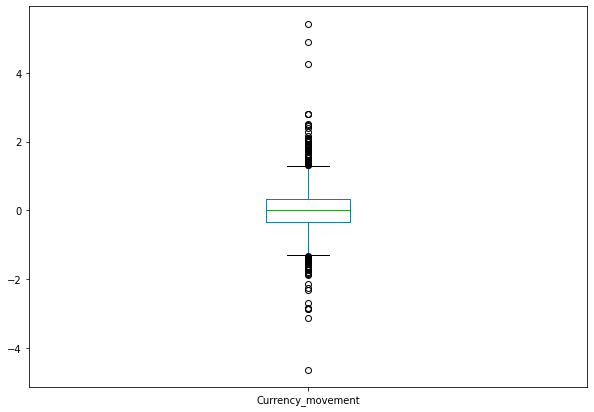

In [30]:
all_data['Currency_movement'].plot(kind='box')

<AxesSubplot:>

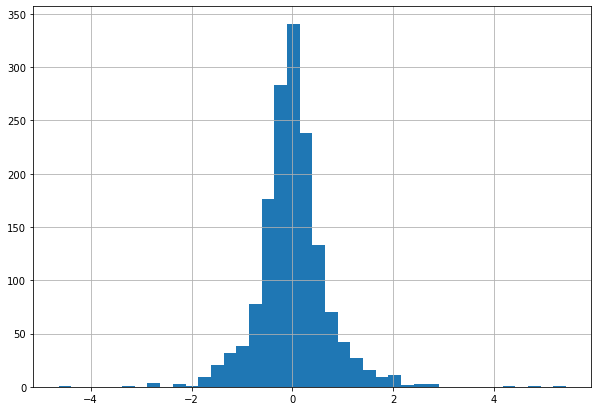

In [31]:
all_data['Currency_movement'].hist(bins=40)

Есть немного выбросов в данных, подчищаем.

In [32]:
all_data = all_data[(all_data.Currency_movement < 4) &
                    (all_data.Currency_movement > -4)]

<AxesSubplot:>

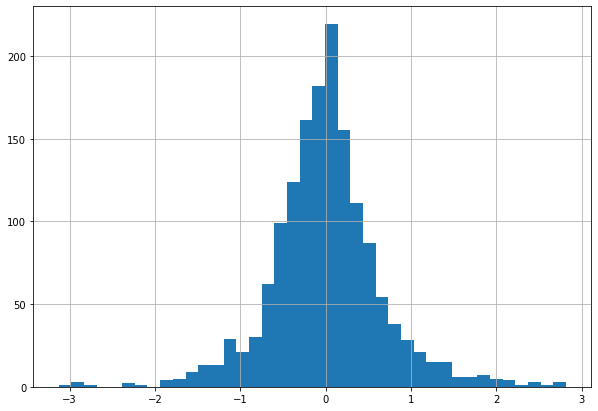

In [33]:
all_data['Currency_movement'].hist(bins=40)

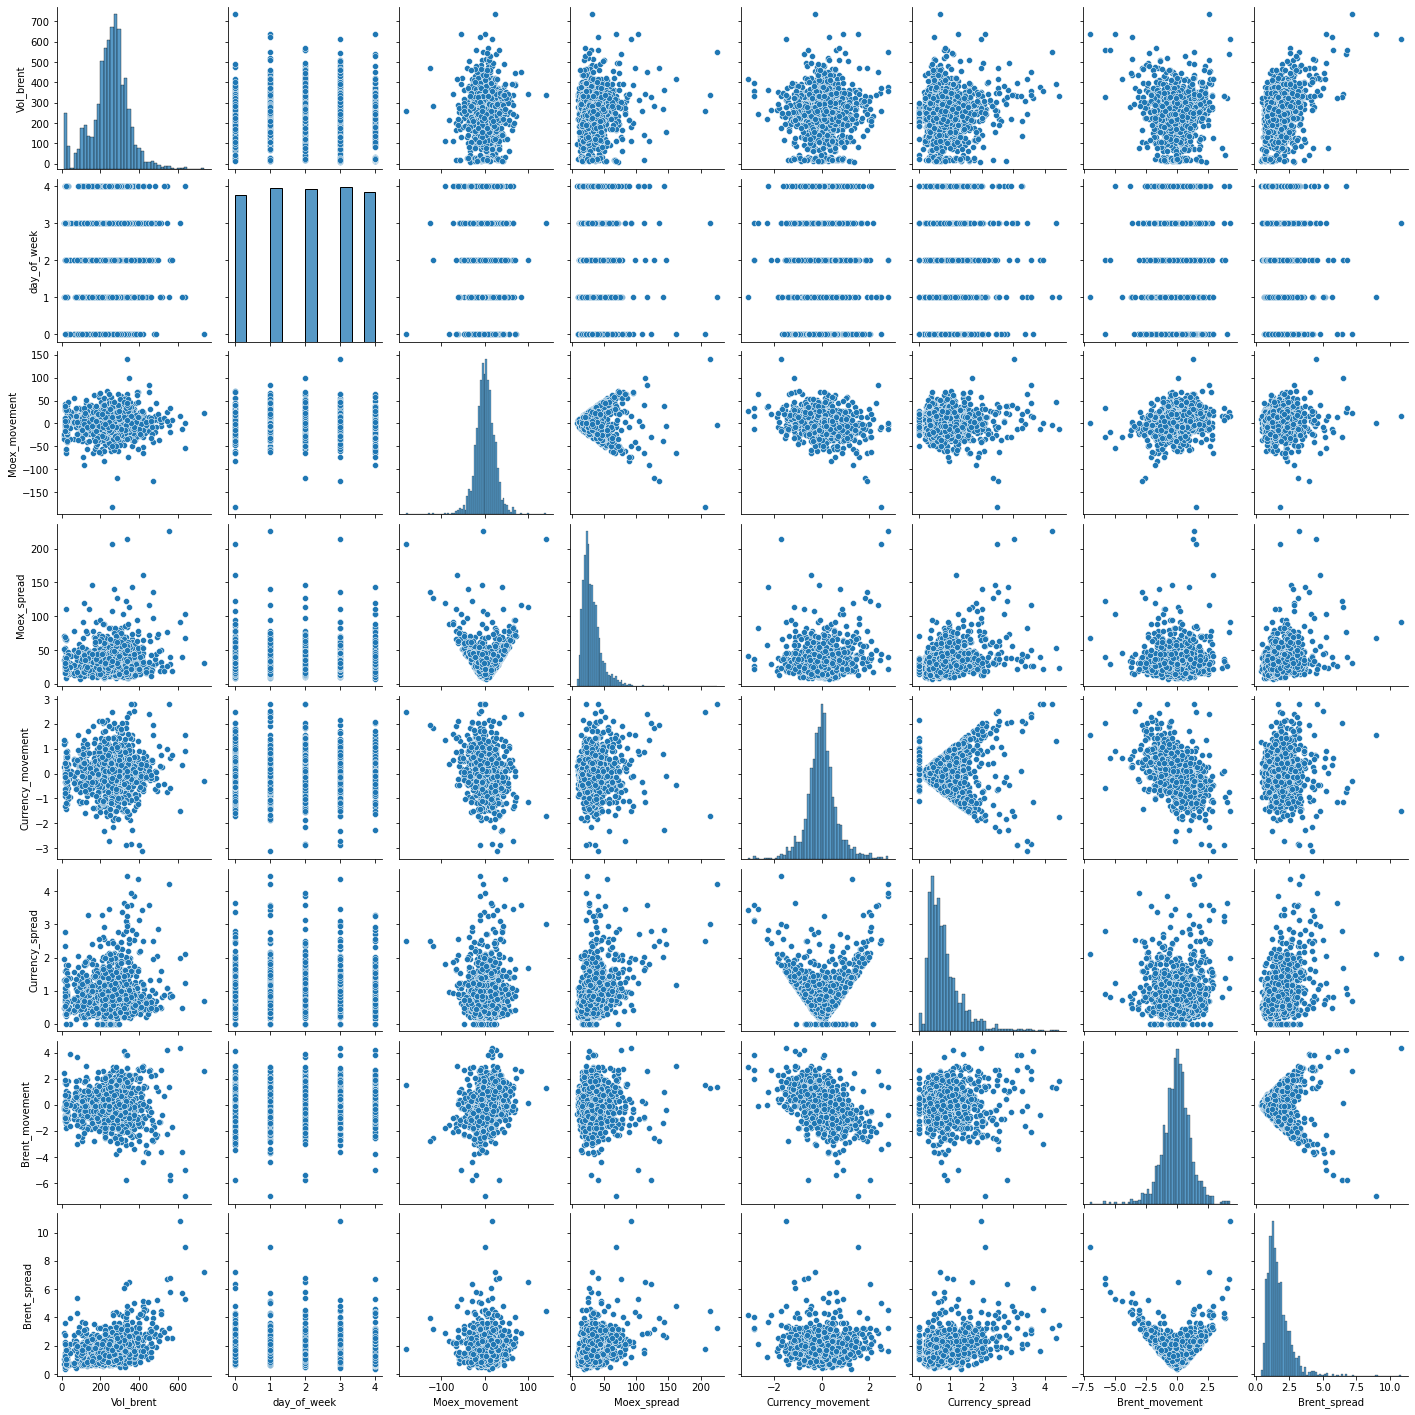

In [34]:
import seaborn as sns

sns.pairplot(all_data)

<AxesSubplot:>

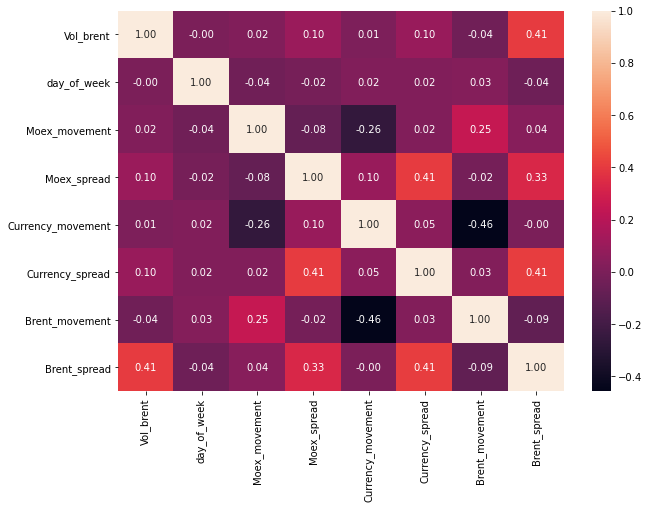

In [35]:
Corr = all_data.corr()
sns.heatmap(Corr, annot=True, fmt='.2f')

Значимых зависимостей нет.

In [36]:
all_data

Vol_brent  day_of_week  Moex_movement  Moex_spread  Currency_movement  \
1     248.990005            1     -10.849854    57.889893             0.0558   
2     262.600006            0      21.800049    37.689941            -0.5165   
3     251.539993            4      24.060059    37.129883             0.0298   
4     289.609985            3      27.250000    36.110107            -0.2994   
5     361.940002            2     -13.849854    58.930176            -0.3052   
...          ...          ...            ...          ...                ...   
1538  208.059998            1      19.880005    44.010010             2.1022   
1539  223.919998            0      -2.010010    30.890015             1.7167   
1540  285.720001            4     -32.239990    61.649902             1.0626   
1541  243.419998            3      65.270020    82.640015            -2.7061   
1542  338.880005            1      45.339966    50.610107             2.2818   

      Currency_spread  Brent_movement  Brent_spread  
1              0.5152           -0.42          1.58  
2              0.6547           -0.20          2.21  
3              0.4912           -0.37          0.87  
4              0.6634            1.18          1.85  
5              0.5261            0.44          1.92  
...               ...             ...           ...  
1538           3.2875           -0.47          2.10  
1539           2.0019           -2.50          2.82  
1540           2.3216           -1.14          2.54  
1541           3.4547           -0.10          2.10  
1542           3.5696           -2.10          3.08  

[1539 rows x 8 columns]

In [37]:
# Изменяем сортировку

all_data_reverse = all_data.sort_index(axis=0, ascending=False)
all_data_reverse

Vol_brent  day_of_week  Moex_movement  Moex_spread  Currency_movement  \
1542  338.880005            1      45.339966    50.610107             2.2818   
1541  243.419998            3      65.270020    82.640015            -2.7061   
1540  285.720001            4     -32.239990    61.649902             1.0626   
1539  223.919998            0      -2.010010    30.890015             1.7167   
1538  208.059998            1      19.880005    44.010010             2.1022   
...          ...          ...            ...          ...                ...   
5     361.940002            2     -13.849854    58.930176            -0.3052   
4     289.609985            3      27.250000    36.110107            -0.2994   
3     251.539993            4      24.060059    37.129883             0.0298   
2     262.600006            0      21.800049    37.689941            -0.5165   
1     248.990005            1     -10.849854    57.889893             0.0558   

      Currency_spread  Brent_movement  Brent_spread  
1542           3.5696           -2.10          3.08  
1541           3.4547           -0.10          2.10  
1540           2.3216           -1.14          2.54  
1539           2.0019           -2.50          2.82  
1538           3.2875           -0.47          2.10  
...               ...             ...           ...  
5              0.5261            0.44          1.92  
4              0.6634            1.18          1.85  
3              0.4912           -0.37          0.87  
2              0.6547           -0.20          2.21  
1              0.5152           -0.42          1.58  

[1539 rows x 8 columns]

Добавляем данные из прошлых периодов в одну строку.

In [38]:
for i in range(1, 3):
    all_data_reverse["Moex_movement_{}".format(
        i)] = all_data_reverse.Moex_movement.shift(i)

all_data_reverse

Vol_brent  day_of_week  Moex_movement  Moex_spread  Currency_movement  \
1542  338.880005            1      45.339966    50.610107             2.2818   
1541  243.419998            3      65.270020    82.640015            -2.7061   
1540  285.720001            4     -32.239990    61.649902             1.0626   
1539  223.919998            0      -2.010010    30.890015             1.7167   
1538  208.059998            1      19.880005    44.010010             2.1022   
...          ...          ...            ...          ...                ...   
5     361.940002            2     -13.849854    58.930176            -0.3052   
4     289.609985            3      27.250000    36.110107            -0.2994   
3     251.539993            4      24.060059    37.129883             0.0298   
2     262.600006            0      21.800049    37.689941            -0.5165   
1     248.990005            1     -10.849854    57.889893             0.0558   

      Currency_spread  Brent_movement  Brent_spread  Moex_movement_1  \
1542           3.5696           -2.10          3.08              NaN   
1541           3.4547           -0.10          2.10        45.339966   
1540           2.3216           -1.14          2.54        65.270020   
1539           2.0019           -2.50          2.82       -32.239990   
1538           3.2875           -0.47          2.10        -2.010010   
...               ...             ...           ...              ...   
5              0.5261            0.44          1.92        52.239990   
4              0.6634            1.18          1.85       -13.849854   
3              0.4912           -0.37          0.87        27.250000   
2              0.6547           -0.20          2.21        24.060059   
1              0.5152           -0.42          1.58        21.800049   

      Moex_movement_2  
1542              NaN  
1541              NaN  
1540        45.339966  
1539        65.270020  
1538       -32.239990  
...               ...  
5           35.449951  
4           52.239990  
3          -13.849854  
2           27.250000  
1           24.060059  

[1539 rows x 10 columns]

In [39]:
for i in range(1, 3):
    all_data_reverse["Moex_spread_{}".format(
        i)] = all_data_reverse.Moex_spread.shift(i)

for i in range(1, 3):
    all_data_reverse["Currency_movement_{}".format(
        i)] = all_data_reverse.Currency_movement.shift(i)

for i in range(1, 3):
    all_data_reverse["Currency_spread_{}".format(
        i)] = all_data_reverse.Currency_spread.shift(i)

for i in range(1, 3):
    all_data_reverse["Brent_movement_{}".format(
        i)] = all_data_reverse.Brent_movement.shift(i)

for i in range(1, 3):
    all_data_reverse["Brent_spread_{}".format(
        i)] = all_data_reverse.Brent_spread.shift(i)


all_data_reverse

Vol_brent  day_of_week  Moex_movement  Moex_spread  Currency_movement  \
1542  338.880005            1      45.339966    50.610107             2.2818   
1541  243.419998            3      65.270020    82.640015            -2.7061   
1540  285.720001            4     -32.239990    61.649902             1.0626   
1539  223.919998            0      -2.010010    30.890015             1.7167   
1538  208.059998            1      19.880005    44.010010             2.1022   
...          ...          ...            ...          ...                ...   
5     361.940002            2     -13.849854    58.930176            -0.3052   
4     289.609985            3      27.250000    36.110107            -0.2994   
3     251.539993            4      24.060059    37.129883             0.0298   
2     262.600006            0      21.800049    37.689941            -0.5165   
1     248.990005            1     -10.849854    57.889893             0.0558   

      Currency_spread  Brent_movement  Brent_spread  Moex_movement_1  \
1542           3.5696           -2.10          3.08              NaN   
1541           3.4547           -0.10          2.10        45.339966   
1540           2.3216           -1.14          2.54        65.270020   
1539           2.0019           -2.50          2.82       -32.239990   
1538           3.2875           -0.47          2.10        -2.010010   
...               ...             ...           ...              ...   
5              0.5261            0.44          1.92        52.239990   
4              0.6634            1.18          1.85       -13.849854   
3              0.4912           -0.37          0.87        27.250000   
2              0.6547           -0.20          2.21        24.060059   
1              0.5152           -0.42          1.58        21.800049   

      Moex_movement_2  Moex_spread_1  Moex_spread_2  Currency_movement_1  \
1542              NaN            NaN            NaN                  NaN   
1541              NaN      50.610107            NaN               2.2818   
1540        45.339966      82.640015      50.610107              -2.7061   
1539        65.270020      61.649902      82.640015               1.0626   
1538       -32.239990      30.890015      61.649902               1.7167   
...               ...            ...            ...                  ...   
5           35.449951      64.790039      65.649902              -0.3204   
4           52.239990      58.930176      64.790039              -0.3052   
3          -13.849854      36.110107      58.930176              -0.2994   
2           27.250000      37.129883      36.110107               0.0298   
1           24.060059      37.689941      37.129883              -0.5165   

      Currency_movement_2  Currency_spread_1  Currency_spread_2  \
1542                  NaN                NaN                NaN   
1541                  NaN             3.5696                NaN   
1540               2.2818             3.4547             3.5696   
1539              -2.7061             2.3216             3.4547   
1538               1.0626             2.0019             2.3216   
...                   ...                ...                ...   
5                 -0.4743             0.7318             0.6355   
4                 -0.3204             0.5261             0.7318   
3                 -0.3052             0.6634             0.5261   
2                 -0.2994             0.4912             0.6634   
1                  0.0298             0.6547             0.4912   

      Brent_movement_1  Brent_movement_2  Brent_spread_1  Brent_spread_2  
1542               NaN               NaN             NaN             NaN  
1541             -2.10               NaN            3.08             NaN  
1540             -0.10             -2.10            2.10            3.08  
1539             -1.14             -0.10            2.54            2.10  
1538             -2.50             -1.14            2.82            2.54  
...          

In [40]:
# Убираем пропуски

all_data_reverse.dropna(axis=0, inplace=True)
all_data_reverse

Vol_brent  day_of_week  Moex_movement  Moex_spread  Currency_movement  \
1540  285.720001            4     -32.239990    61.649902             1.0626   
1539  223.919998            0      -2.010010    30.890015             1.7167   
1538  208.059998            1      19.880005    44.010010             2.1022   
1537  122.339996            2      22.809937    35.170044            -0.4731   
1536   17.930000            3       6.250000    30.750000             0.4400   
...          ...          ...            ...          ...                ...   
5     361.940002            2     -13.849854    58.930176            -0.3052   
4     289.609985            3      27.250000    36.110107            -0.2994   
3     251.539993            4      24.060059    37.129883             0.0298   
2     262.600006            0      21.800049    37.689941            -0.5165   
1     248.990005            1     -10.849854    57.889893             0.0558   

      Currency_spread  Brent_movement  Brent_spread  Moex_movement_1  \
1540           2.3216           -1.14          2.54        65.270020   
1539           2.0019           -2.50          2.82       -32.239990   
1538           3.2875           -0.47          2.10        -2.010010   
1537           1.8690            1.85          3.62        19.880005   
1536           2.3644           -1.01          3.62        22.809937   
...               ...             ...           ...              ...   
5              0.5261            0.44          1.92        52.239990   
4              0.6634            1.18          1.85       -13.849854   
3              0.4912           -0.37          0.87        27.250000   
2              0.6547           -0.20          2.21        24.060059   
1              0.5152           -0.42          1.58        21.800049   

      Moex_movement_2  Moex_spread_1  Moex_spread_2  Currency_movement_1  \
1540        45.339966      82.640015      50.610107              -2.7061   
1539        65.270020      61.649902      82.640015               1.0626   
1538       -32.239990      30.890015      61.649902               1.7167   
1537        -2.010010      44.010010      30.890015               2.1022   
1536        19.880005      35.170044      44.010010              -0.4731   
...               ...            ...            ...                  ...   
5           35.449951      64.790039      65.649902              -0.3204   
4           52.239990      58.930176      64.790039              -0.3052   
3          -13.849854      36.110107      58.930176              -0.2994   
2           27.250000      37.129883      36.110107               0.0298   
1           24.060059      37.689941      37.129883              -0.5165   

      Currency_movement_2  Currency_spread_1  Currency_spread_2  \
1540               2.2818             3.4547             3.5696   
1539              -2.7061             2.3216             3.4547   
1538               1.0626             2.0019             2.3216   
1537               1.7167             3.2875             2.0019   
1536               2.1022             1.8690             3.2875   
...                   ...                ...                ...   
5                 -0.4743             0.7318             0.6355   
4                 -0.3204             0.5261             0.7318   
3                 -0.3052             0.6634             0.5261   
2                 -0.2994             0.4912             0.6634   
1                  0.0298             0.6547             0.4912   

      Brent_movement_1  Brent_movement_2  Brent_spread_1  Brent_spread_2  
1540             -0.10             -2.10            2.10            3.08  
1539             -1.14             -0.10            2.54            2.10  
1538             -2.50             -1.14            2.82            2.54  
1537             -0.47             -2.50            2.10            2.82  
1536              1.85             -0.47            3.62            2.10  
...          

In [41]:
# Для удобства меняем порядок столбцов

all_data_reverse = all_data_reverse[['day_of_week',
                                    'Moex_movement_1', 'Moex_movement_2', 'Moex_movement',
                                    'Moex_spread_1', 'Moex_spread_2', 'Moex_spread',
                                    'Brent_movement_1', 'Brent_movement_2', 'Brent_movement',
                                    'Brent_spread_1', 'Brent_spread_2', 'Brent_spread', 'Vol_brent',
                                    'Currency_spread_1', 'Currency_spread_2', 'Currency_spread',
                                    'Currency_movement_1', 'Currency_movement_2', 'Currency_movement']]

all_data_reverse

day_of_week  Moex_movement_1  Moex_movement_2  Moex_movement  \
1540            4        65.270020        45.339966     -32.239990   
1539            0       -32.239990        65.270020      -2.010010   
1538            1        -2.010010       -32.239990      19.880005   
1537            2        19.880005        -2.010010      22.809937   
1536            3        22.809937        19.880005       6.250000   
...           ...              ...              ...            ...   
5               2        52.239990        35.449951     -13.849854   
4               3       -13.849854        52.239990      27.250000   
3               4        27.250000       -13.849854      24.060059   
2               0        24.060059        27.250000      21.800049   
1               1        21.800049        24.060059     -10.849854   

      Moex_spread_1  Moex_spread_2  Moex_spread  Brent_movement_1  \
1540      82.640015      50.610107    61.649902             -0.10   
1539      61.649902      82.640015    30.890015             -1.14   
1538      30.890015      61.649902    44.010010             -2.50   
1537      44.010010      30.890015    35.170044             -0.47   
1536      35.170044      44.010010    30.750000              1.85   
...             ...            ...          ...               ...   
5         64.790039      65.649902    58.930176             -0.61   
4         58.930176      64.790039    36.110107              0.44   
3         36.110107      58.930176    37.129883              1.18   
2         37.129883      36.110107    37.689941             -0.37   
1         37.689941      37.129883    57.889893             -0.20   

      Brent_movement_2  Brent_movement  Brent_spread_1  Brent_spread_2  \
1540             -2.10           -1.14            2.10            3.08   
1539             -0.10           -2.50            2.54            2.10   
1538             -1.14           -0.47            2.82            2.54   
1537             -2.50            1.85            2.10            2.82   
1536             -0.47           -1.01            3.62            2.10   
...                ...             ...             ...             ...   
5                 2.20            0.44            2.21            3.02   
4                -0.61            1.18            1.92            2.21   
3                 0.44           -0.37            1.85            1.92   
2                 1.18           -0.20            0.87            1.85   
1                -0.37           -0.42            2.21            0.87   

      Brent_spread   Vol_brent  Currency_spread_1  Currency_spread_2  \
1540          2.54  285.720001             3.4547             3.5696   
1539          2.82  223.919998             2.3216             3.4547   
1538          2.10  208.059998             2.0019             2.3216   
1537          3.62  122.339996             3.2875             2.0019   
1536          3.62   17.930000             1.8690             3.2875   
...            ...         ...                ...                ...   
5             1.92  361.940002             0.7318             0.6355   
4             1.85  289.609985             0.5261             0.7318   
3             0.87  251.539993             0.6634             0.5261   
2             2.21  262.600006             0.4912             0.6634   
1             1.58  248.990005             0.6547             0.4912   

      Currency_spread  Currency_movement_1  Currency_movement_2  \
1540           2.3216              -2.7061               2.2818   
1539           2.0019               1.0626              -2.7061   
1538           3.2875               1.7167               1.0626   
1537           1.8690               2.1022               1.7167   
1536           2.3644              -0.4731               2.1022   
...               ...                  ...                  ...   
5              0.5261              -0.3204              -0.4743   
4              0.6634              -0.3052    

Добавляем целевую переменную - это движение цены на следующий день.

In [42]:
data_for_regression = all_data_reverse.sort_index(axis=0,ascending = True)

data_for_regression["Cur_move_next_day"] = data_for_regression.Currency_movement.shift(1)
    
data_for_regression

day_of_week  Moex_movement_1  Moex_movement_2  Moex_movement  \
1               1        21.800049        24.060059     -10.849854   
2               0        24.060059        27.250000      21.800049   
3               4        27.250000       -13.849854      24.060059   
4               3       -13.849854        52.239990      27.250000   
5               2        52.239990        35.449951     -13.849854   
...           ...              ...              ...            ...   
1536            3        22.809937        19.880005       6.250000   
1537            2        19.880005        -2.010010      22.809937   
1538            1        -2.010010       -32.239990      19.880005   
1539            0       -32.239990        65.270020      -2.010010   
1540            4        65.270020        45.339966     -32.239990   

      Moex_spread_1  Moex_spread_2  Moex_spread  Brent_movement_1  \
1         37.689941      37.129883    57.889893             -0.20   
2         37.129883      36.110107    37.689941             -0.37   
3         36.110107      58.930176    37.129883              1.18   
4         58.930176      64.790039    36.110107              0.44   
5         64.790039      65.649902    58.930176             -0.61   
...             ...            ...          ...               ...   
1536      35.170044      44.010010    30.750000              1.85   
1537      44.010010      30.890015    35.170044             -0.47   
1538      30.890015      61.649902    44.010010             -2.50   
1539      61.649902      82.640015    30.890015             -1.14   
1540      82.640015      50.610107    61.649902             -0.10   

      Brent_movement_2  Brent_movement  ...  Brent_spread_2  Brent_spread  \
1                -0.37           -0.42  ...            0.87          1.58   
2                 1.18           -0.20  ...            1.85          2.21   
3                 0.44           -0.37  ...            1.92          0.87   
4                -0.61            1.18  ...            2.21          1.85   
5                 2.20            0.44  ...            3.02          1.92   
...                ...             ...  ...             ...           ...   
1536             -0.47           -1.01  ...            2.10          3.62   
1537             -2.50            1.85  ...            2.82          3.62   
1538             -1.14           -0.47  ...            2.54          2.10   
1539             -0.10           -2.50  ...            2.10          2.82   
1540             -2.10           -1.14  ...            3.08          2.54   

       Vol_brent  Currency_spread_1  Currency_spread_2  Currency_spread  \
1     248.990005             0.6547             0.4912           0.5152   
2     262.600006             0.4912             0.6634           0.6547   
3     251.539993             0.6634             0.5261           0.4912   
4     289.609985             0.5261             0.7318           0.6634   
5     361.940002             0.7318             0.6355           0.5261   
...          ...                ...                ...              ...   
1536   17.930000             1.8690             3.2875           2.3644   
1537  122.339996             3.2875             2.0019           1.8690   
1538  208.059998             2.0019             2.3216           3.2875   
1539  223.919998             2.3216             3.4547           2.0019   
1540  285.720001             3.4547             3.5696           2.3216   

      Currency_movement_1  Currency_movement_2  Currency_movement  \
1                 -0.5165               0.0298             0.0558   
2                  0.0298              -0.2994            -0.5165   
3                 -0.2994              -0.3052             0.0298   
4                 -0.3052              -0.3204            -0.2994   
5                 -0.3204              -0.4743            -0.3052   
...                   ...                  ...                ...   
1536              -0.4731  

In [43]:
data_for_regression.dropna(axis=0, inplace=True)
data_for_regression

day_of_week  Moex_movement_1  Moex_movement_2  Moex_movement  \
2               0        24.060059        27.250000      21.800049   
3               4        27.250000       -13.849854      24.060059   
4               3       -13.849854        52.239990      27.250000   
5               2        52.239990        35.449951     -13.849854   
6               1        35.449951        -5.449951      52.239990   
...           ...              ...              ...            ...   
1536            3        22.809937        19.880005       6.250000   
1537            2        19.880005        -2.010010      22.809937   
1538            1        -2.010010       -32.239990      19.880005   
1539            0       -32.239990        65.270020      -2.010010   
1540            4        65.270020        45.339966     -32.239990   

      Moex_spread_1  Moex_spread_2  Moex_spread  Brent_movement_1  \
2         37.129883      36.110107    37.689941             -0.37   
3         36.110107      58.930176    37.129883              1.18   
4         58.930176      64.790039    36.110107              0.44   
5         64.790039      65.649902    58.930176             -0.61   
6         65.649902      49.280029    64.790039              2.20   
...             ...            ...          ...               ...   
1536      35.170044      44.010010    30.750000              1.85   
1537      44.010010      30.890015    35.170044             -0.47   
1538      30.890015      61.649902    44.010010             -2.50   
1539      61.649902      82.640015    30.890015             -1.14   
1540      82.640015      50.610107    61.649902             -0.10   

      Brent_movement_2  Brent_movement  ...  Brent_spread_2  Brent_spread  \
2                 1.18           -0.20  ...            1.85          2.21   
3                 0.44           -0.37  ...            1.92          0.87   
4                -0.61            1.18  ...            2.21          1.85   
5                 2.20            0.44  ...            3.02          1.92   
6                 2.64           -0.61  ...            4.42          2.21   
...                ...             ...  ...             ...           ...   
1536             -0.47           -1.01  ...            2.10          3.62   
1537             -2.50            1.85  ...            2.82          3.62   
1538             -1.14           -0.47  ...            2.54          2.10   
1539             -0.10           -2.50  ...            2.10          2.82   
1540             -2.10           -1.14  ...            3.08          2.54   

       Vol_brent  Currency_spread_1  Currency_spread_2  Currency_spread  \
2     262.600006             0.4912             0.6634           0.6547   
3     251.539993             0.6634             0.5261           0.4912   
4     289.609985             0.5261             0.7318           0.6634   
5     361.940002             0.7318             0.6355           0.5261   
6     302.609985             0.6355             1.5847           0.7318   
...          ...                ...                ...              ...   
1536   17.930000             1.8690             3.2875           2.3644   
1537  122.339996             3.2875             2.0019           1.8690   
1538  208.059998             2.0019             2.3216           3.2875   
1539  223.919998             2.3216             3.4547           2.0019   
1540  285.720001             3.4547             3.5696           2.3216   

      Currency_movement_1  Currency_movement_2  Currency_movement  \
2                  0.0298              -0.2994            -0.5165   
3                 -0.2994              -0.3052             0.0298   
4                 -0.3052              -0.3204            -0.2994   
5                 -0.3204              -0.4743            -0.3052   
6                 -0.4743               0.7275            -0.3204   
...                   ...                  ...                ...   
1536              -0.4731  

<AxesSubplot:>

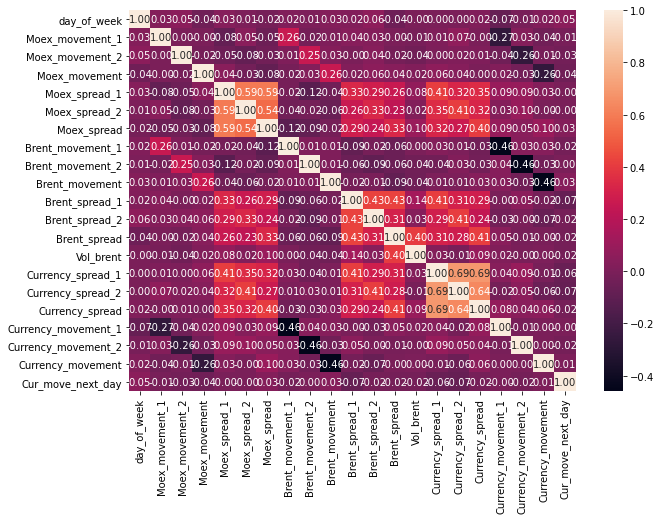

In [44]:
Corr=data_for_regression.corr()
sns.heatmap(Corr, annot=True, fmt='.2f')

In [45]:
# Сделали OHE для категориальной переменной
tabl_day_of_week = pd.get_dummies(data_for_regression['day_of_week'], drop_first=True, prefix='day_of_week')

# Объединили назад наши таблички
data_for_regression = pd.concat([data_for_regression.drop('day_of_week', axis=1), tabl_day_of_week], axis=1)
data_for_regression

Moex_movement_1  Moex_movement_2  Moex_movement  Moex_spread_1  \
2           24.060059        27.250000      21.800049      37.129883   
3           27.250000       -13.849854      24.060059      36.110107   
4          -13.849854        52.239990      27.250000      58.930176   
5           52.239990        35.449951     -13.849854      64.790039   
6           35.449951        -5.449951      52.239990      65.649902   
...               ...              ...            ...            ...   
1536        22.809937        19.880005       6.250000      35.170044   
1537        19.880005        -2.010010      22.809937      44.010010   
1538        -2.010010       -32.239990      19.880005      30.890015   
1539       -32.239990        65.270020      -2.010010      61.649902   
1540        65.270020        45.339966     -32.239990      82.640015   

      Moex_spread_2  Moex_spread  Brent_movement_1  Brent_movement_2  \
2         36.110107    37.689941             -0.37              1.18   
3         58.930176    37.129883              1.18              0.44   
4         64.790039    36.110107              0.44             -0.61   
5         65.649902    58.930176             -0.61              2.20   
6         49.280029    64.790039              2.20              2.64   
...             ...          ...               ...               ...   
1536      44.010010    30.750000              1.85             -0.47   
1537      30.890015    35.170044             -0.47             -2.50   
1538      61.649902    44.010010             -2.50             -1.14   
1539      82.640015    30.890015             -1.14             -0.10   
1540      50.610107    61.649902             -0.10             -2.10   

      Brent_movement  Brent_spread_1  ...  Currency_spread_2  Currency_spread  \
2              -0.20            0.87  ...             0.6634           0.6547   
3              -0.37            1.85  ...             0.5261           0.4912   
4               1.18            1.92  ...             0.7318           0.6634   
5               0.44            2.21  ...             0.6355           0.5261   
6              -0.61            3.02  ...             1.5847           0.7318   
...              ...             ...  ...                ...              ...   
1536           -1.01            3.62  ...             3.2875           2.3644   
1537            1.85            2.10  ...             2.0019           1.8690   
1538           -0.47            2.82  ...             2.3216           3.2875   
1539           -2.50            2.54  ...             3.4547           2.0019   
1540           -1.14            2.10  ...             3.5696           2.3216   

      Currency_movement_1  Currency_movement_2  Currency_movement  \
2                  0.0298              -0.2994            -0.5165   
3                 -0.2994              -0.3052             0.0298   
4                 -0.3052              -0.3204            -0.2994   
5                 -0.3204              -0.4743            -0.3052   
6                 -0.4743               0.7275            -0.3204   
...                   ...                  ...                ...   
1536              -0.4731               2.1022             0.4400   
1537               2.1022               1.7167            -0.4731   
1538               1.7167               1.0626             2.1022   
1539               1.0626              -2.7061             1.7167   
1540              -2.7061               2.2818             1.0626   

      Cur_move_next_day  day_of_week_1  day_of_week_2  day_of_week_3  \
2                0.0558              0              0              0   
3               -0.5165              0              0              0   
4                0.0298              0              0              1   
5               -0.2994              0              1              0   
6               -0.3052              1              0              0   
...                 ...            ...    

Датасет "data_for_regression" с целевой переменной "Cur_move_next_day" для применения регрессионных моделей готов.

Подготовим датасет для моделей классификации.

Создадим новую колонку "Cur_move_up_or_down". Если движение цены на следующий день было положительным ставим "1", отрицательное - "0".

In [46]:
data_for_classification = data_for_regression.copy()

def up_or_down(row):
    if row['Cur_move_next_day']>0:
        return 1
    else:
        return 0

    
data_for_classification['Cur_move_up_or_down'] = data_for_classification.apply(up_or_down, axis=1)
data_for_classification

Moex_movement_1  Moex_movement_2  Moex_movement  Moex_spread_1  \
2           24.060059        27.250000      21.800049      37.129883   
3           27.250000       -13.849854      24.060059      36.110107   
4          -13.849854        52.239990      27.250000      58.930176   
5           52.239990        35.449951     -13.849854      64.790039   
6           35.449951        -5.449951      52.239990      65.649902   
...               ...              ...            ...            ...   
1536        22.809937        19.880005       6.250000      35.170044   
1537        19.880005        -2.010010      22.809937      44.010010   
1538        -2.010010       -32.239990      19.880005      30.890015   
1539       -32.239990        65.270020      -2.010010      61.649902   
1540        65.270020        45.339966     -32.239990      82.640015   

      Moex_spread_2  Moex_spread  Brent_movement_1  Brent_movement_2  \
2         36.110107    37.689941             -0.37              1.18   
3         58.930176    37.129883              1.18              0.44   
4         64.790039    36.110107              0.44             -0.61   
5         65.649902    58.930176             -0.61              2.20   
6         49.280029    64.790039              2.20              2.64   
...             ...          ...               ...               ...   
1536      44.010010    30.750000              1.85             -0.47   
1537      30.890015    35.170044             -0.47             -2.50   
1538      61.649902    44.010010             -2.50             -1.14   
1539      82.640015    30.890015             -1.14             -0.10   
1540      50.610107    61.649902             -0.10             -2.10   

      Brent_movement  Brent_spread_1  ...  Currency_spread  \
2              -0.20            0.87  ...           0.6547   
3              -0.37            1.85  ...           0.4912   
4               1.18            1.92  ...           0.6634   
5               0.44            2.21  ...           0.5261   
6              -0.61            3.02  ...           0.7318   
...              ...             ...  ...              ...   
1536           -1.01            3.62  ...           2.3644   
1537            1.85            2.10  ...           1.8690   
1538           -0.47            2.82  ...           3.2875   
1539           -2.50            2.54  ...           2.0019   
1540           -1.14            2.10  ...           2.3216   

      Currency_movement_1  Currency_movement_2  Currency_movement  \
2                  0.0298              -0.2994            -0.5165   
3                 -0.2994              -0.3052             0.0298   
4                 -0.3052              -0.3204            -0.2994   
5                 -0.3204              -0.4743            -0.3052   
6                 -0.4743               0.7275            -0.3204   
...                   ...                  ...                ...   
1536              -0.4731               2.1022             0.4400   
1537               2.1022               1.7167            -0.4731   
1538               1.7167               1.0626             2.1022   
1539               1.0626              -2.7061             1.7167   
1540              -2.7061               2.2818             1.0626   

      Cur_move_next_day  day_of_week_1  day_of_week_2  day_of_week_3  \
2                0.0558              0              0              0   
3               -0.5165              0              0              0   
4                0.0298              0              0              1   
5               -0.2994              0              1              0   
6               -0.3052              1              0              0   
...                 ...            ...            ...            ...   
1536            -0.1095              0              0              1   
1537             0.4400              0              1              0   
1538            -0.4731              1              0 

In [47]:
# Удаляем лишний столбец

data_for_classification = data_for_classification.drop(['Cur_move_next_day'], axis=1)
data_for_classification

Moex_movement_1  Moex_movement_2  Moex_movement  Moex_spread_1  \
2           24.060059        27.250000      21.800049      37.129883   
3           27.250000       -13.849854      24.060059      36.110107   
4          -13.849854        52.239990      27.250000      58.930176   
5           52.239990        35.449951     -13.849854      64.790039   
6           35.449951        -5.449951      52.239990      65.649902   
...               ...              ...            ...            ...   
1536        22.809937        19.880005       6.250000      35.170044   
1537        19.880005        -2.010010      22.809937      44.010010   
1538        -2.010010       -32.239990      19.880005      30.890015   
1539       -32.239990        65.270020      -2.010010      61.649902   
1540        65.270020        45.339966     -32.239990      82.640015   

      Moex_spread_2  Moex_spread  Brent_movement_1  Brent_movement_2  \
2         36.110107    37.689941             -0.37              1.18   
3         58.930176    37.129883              1.18              0.44   
4         64.790039    36.110107              0.44             -0.61   
5         65.649902    58.930176             -0.61              2.20   
6         49.280029    64.790039              2.20              2.64   
...             ...          ...               ...               ...   
1536      44.010010    30.750000              1.85             -0.47   
1537      30.890015    35.170044             -0.47             -2.50   
1538      61.649902    44.010010             -2.50             -1.14   
1539      82.640015    30.890015             -1.14             -0.10   
1540      50.610107    61.649902             -0.10             -2.10   

      Brent_movement  Brent_spread_1  ...  Currency_spread_2  Currency_spread  \
2              -0.20            0.87  ...             0.6634           0.6547   
3              -0.37            1.85  ...             0.5261           0.4912   
4               1.18            1.92  ...             0.7318           0.6634   
5               0.44            2.21  ...             0.6355           0.5261   
6              -0.61            3.02  ...             1.5847           0.7318   
...              ...             ...  ...                ...              ...   
1536           -1.01            3.62  ...             3.2875           2.3644   
1537            1.85            2.10  ...             2.0019           1.8690   
1538           -0.47            2.82  ...             2.3216           3.2875   
1539           -2.50            2.54  ...             3.4547           2.0019   
1540           -1.14            2.10  ...             3.5696           2.3216   

      Currency_movement_1  Currency_movement_2  Currency_movement  \
2                  0.0298              -0.2994            -0.5165   
3                 -0.2994              -0.3052             0.0298   
4                 -0.3052              -0.3204            -0.2994   
5                 -0.3204              -0.4743            -0.3052   
6                 -0.4743               0.7275            -0.3204   
...                   ...                  ...                ...   
1536              -0.4731               2.1022             0.4400   
1537               2.1022               1.7167            -0.4731   
1538               1.7167               1.0626             2.1022   
1539               1.0626              -2.7061             1.7167   
1540              -2.7061               2.2818             1.0626   

      day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
2                 0              0              0              0   
3                 0              0              0              1   
4                 0              0              1              0   
5                 0              1              0              0   
6                 1              0              0              0   
...             ...            ...            ...            ...  

<AxesSubplot:>

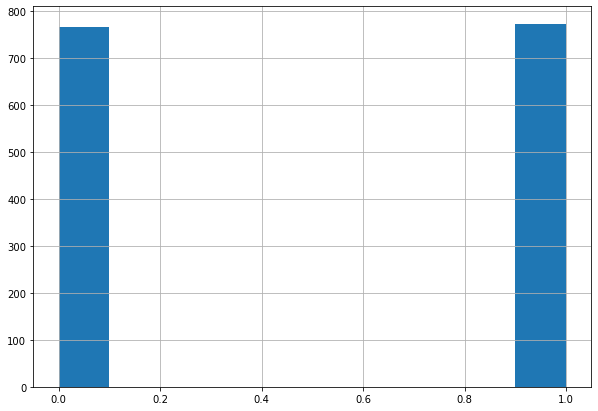

In [48]:
# Проверяем распределение целевой переменной

data_for_classification.Cur_move_up_or_down.hist()


## Регрессия

In [49]:
from sklearn.model_selection import train_test_split

# Разбиваем на тренировочную и тестовую выборку

X_train, X_test, y_train, y_test = train_test_split(
    data_for_regression.drop(['Cur_move_next_day'], axis=1), 
    data_for_regression['Cur_move_next_day'], 
    test_size=0.30, 
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1075, 23), (461, 23), (1075,), (461,))

In [50]:
from sklearn.preprocessing import StandardScaler

# Нормируем данные
# объявили скалировщик!
scaler = StandardScaler()

# учим скалировщик скалировать все переменны на трэйне
scaler.fit(X_train[['Moex_movement_1', 'Moex_movement_2', 'Moex_movement', 'Moex_spread_1', 'Moex_spread_2', 'Moex_spread', 'Brent_movement_1', 'Brent_movement_2', 'Brent_movement',
                    'Brent_spread_1', 'Brent_spread_2', 'Brent_spread', 'Vol_brent', 'Currency_spread_1', 'Currency_spread_2', 'Currency_spread', 'Currency_movement_1', 'Currency_movement_2', 'Currency_movement']])

# Применяем скалировщик к трэйну
df_train_scale = scaler.transform(X_train[['Moex_movement_1', 'Moex_movement_2', 'Moex_movement', 'Moex_spread_1', 'Moex_spread_2', 'Moex_spread', 'Brent_movement_1', 'Brent_movement_2', 'Brent_movement',
                                           'Brent_spread_1', 'Brent_spread_2', 'Brent_spread', 'Vol_brent', 'Currency_spread_1', 'Currency_spread_2', 'Currency_spread', 'Currency_movement_1', 'Currency_movement_2', 'Currency_movement']])

# Применяем скалирвощик к тесту
df_test_scale = scaler.transform(X_test[['Moex_movement_1', 'Moex_movement_2', 'Moex_movement', 'Moex_spread_1', 'Moex_spread_2', 'Moex_spread', 'Brent_movement_1', 'Brent_movement_2', 'Brent_movement',
                                         'Brent_spread_1', 'Brent_spread_2', 'Brent_spread', 'Vol_brent', 'Currency_spread_1', 'Currency_spread_2', 'Currency_spread', 'Currency_movement_1', 'Currency_movement_2', 'Currency_movement']])

# Заменяем значения на отскалированные
X_train[['Moex_movement_1', 'Moex_movement_2', 'Moex_movement', 'Moex_spread_1', 'Moex_spread_2', 'Moex_spread', 'Brent_movement_1', 'Brent_movement_2', 'Brent_movement', 'Brent_spread_1',
         'Brent_spread_2', 'Brent_spread', 'Vol_brent', 'Currency_spread_1', 'Currency_spread_2', 'Currency_spread', 'Currency_movement_1', 'Currency_movement_2', 'Currency_movement']] = df_train_scale
X_test[['Moex_movement_1', 'Moex_movement_2', 'Moex_movement', 'Moex_spread_1', 'Moex_spread_2', 'Moex_spread', 'Brent_movement_1', 'Brent_movement_2', 'Brent_movement', 'Brent_spread_1',
        'Brent_spread_2', 'Brent_spread', 'Vol_brent', 'Currency_spread_1', 'Currency_spread_2', 'Currency_spread', 'Currency_movement_1', 'Currency_movement_2', 'Currency_movement']] = df_test_scale

Построим константный прогноз. Предположим, что движение стоимости валюты равно среднему значению. Это самый премитивный прогноз, который мы можем сделать. Мы будем сравнивать с ним прогнозы более сложных моделей. 

In [51]:
import numpy as np

y_mean = np.mean(y_train)                     # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену доллара в тестовой выборке
y_pred_naive[:5]

array([0.01436381, 0.01436381, 0.01436381, 0.01436381, 0.01436381])

In [52]:
from sklearn import metrics  # подгружаем метрики

In [53]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [54]:
def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:',  metrics.r2_score(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    pass

In [55]:
print_metrics(y_test, y_pred_naive)

MAE: 0.44137187307672876
RMSE: 0.6191152062125669
R2: -0.0025630011052648616
MAPE: 103.09272586215297


Обучим модель линейной регрессии.

In [56]:
from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [57]:
print_metrics(y_test,y_pred_regr)

MAE: 0.4472584738366802
RMSE: 0.6304664554309092
R2: -0.03966326794022779
MAPE: 128.83849524030276


Прогноз хуже, чем у константного.

Попробуем применить другой алгоритм.

In [58]:
import xgboost as xgb

In [59]:
# Объявляем модель

xgb_r = xgb.XGBRegressor(
    learning_rate=0.01,
    max_depth=10,
    n_estimators=500,
    objective="reg:linear"
)

In [60]:
# Фитим модель
xgb_r.fit(X_train, y_train)

[18:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [61]:
# Пробуем предсказать

pred = xgb_r.predict(X_test)

In [62]:
print_metrics(y_test,pred)

MAE: 0.47334872163162145
RMSE: 0.6709345068485655
R2: -0.1774134393718645
MAPE: 191.25830820430346


Попробуем подобрать гиперпараметры.

In [63]:
from sklearn.model_selection import GridSearchCV

# Решётка для перебора параметра 
param_grid = [
    {'n_estimators': [100, 500, 1000],
     'max_depth': [5, 30, 50],
     'learning_rate': [0.01, 0.1, 0.5]}
]

xgb_regressor = xgb.XGBRegressor()
grid_search = GridSearchCV(xgb_regressor, param_grid, scoring='r2', return_train_score=True)


In [64]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
      

In [65]:
import joblib

# Сохраним модель с лучшими параметрами для дальнейшего использования

xgb_r_GS = grid_search.best_estimator_
joblib.dump(xgb_r_GS, 'XGB_Regressor.pkl')

['XGB_Regressor.pkl']

In [66]:
# Подгрузим модель

xgb_r_GS_ = joblib.load('XGB_Regressor.pkl')

In [67]:
grid_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
# Пробуем предсказать

pred_best = xgb_r_GS_.predict(X_test)

In [69]:
print_metrics(y_test, pred_best)

MAE: 0.48603605683651174
RMSE: 0.6688128527460516
R2: -0.16997869188782877
MAPE: 216.9632428947248


Регрессионные модели не позволяют делать прогноз на основе имеющихся данных.

## Классификация

In [70]:
data_for_classification

Moex_movement_1  Moex_movement_2  Moex_movement  Moex_spread_1  \
2           24.060059        27.250000      21.800049      37.129883   
3           27.250000       -13.849854      24.060059      36.110107   
4          -13.849854        52.239990      27.250000      58.930176   
5           52.239990        35.449951     -13.849854      64.790039   
6           35.449951        -5.449951      52.239990      65.649902   
...               ...              ...            ...            ...   
1536        22.809937        19.880005       6.250000      35.170044   
1537        19.880005        -2.010010      22.809937      44.010010   
1538        -2.010010       -32.239990      19.880005      30.890015   
1539       -32.239990        65.270020      -2.010010      61.649902   
1540        65.270020        45.339966     -32.239990      82.640015   

      Moex_spread_2  Moex_spread  Brent_movement_1  Brent_movement_2  \
2         36.110107    37.689941             -0.37              1.18   
3         58.930176    37.129883              1.18              0.44   
4         64.790039    36.110107              0.44             -0.61   
5         65.649902    58.930176             -0.61              2.20   
6         49.280029    64.790039              2.20              2.64   
...             ...          ...               ...               ...   
1536      44.010010    30.750000              1.85             -0.47   
1537      30.890015    35.170044             -0.47             -2.50   
1538      61.649902    44.010010             -2.50             -1.14   
1539      82.640015    30.890015             -1.14             -0.10   
1540      50.610107    61.649902             -0.10             -2.10   

      Brent_movement  Brent_spread_1  ...  Currency_spread_2  Currency_spread  \
2              -0.20            0.87  ...             0.6634           0.6547   
3              -0.37            1.85  ...             0.5261           0.4912   
4               1.18            1.92  ...             0.7318           0.6634   
5               0.44            2.21  ...             0.6355           0.5261   
6              -0.61            3.02  ...             1.5847           0.7318   
...              ...             ...  ...                ...              ...   
1536           -1.01            3.62  ...             3.2875           2.3644   
1537            1.85            2.10  ...             2.0019           1.8690   
1538           -0.47            2.82  ...             2.3216           3.2875   
1539           -2.50            2.54  ...             3.4547           2.0019   
1540           -1.14            2.10  ...             3.5696           2.3216   

      Currency_movement_1  Currency_movement_2  Currency_movement  \
2                  0.0298              -0.2994            -0.5165   
3                 -0.2994              -0.3052             0.0298   
4                 -0.3052              -0.3204            -0.2994   
5                 -0.3204              -0.4743            -0.3052   
6                 -0.4743               0.7275            -0.3204   
...                   ...                  ...                ...   
1536              -0.4731               2.1022             0.4400   
1537               2.1022               1.7167            -0.4731   
1538               1.7167               1.0626             2.1022   
1539               1.0626              -2.7061             1.7167   
1540              -2.7061               2.2818             1.0626   

      day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
2                 0              0              0              0   
3                 0              0              0              1   
4                 0              0              1              0   
5                 0              1              0              0   
6                 1              0              0              0   
...             ...            ...            ...            ...  

Посмотрим еще раз на данные.

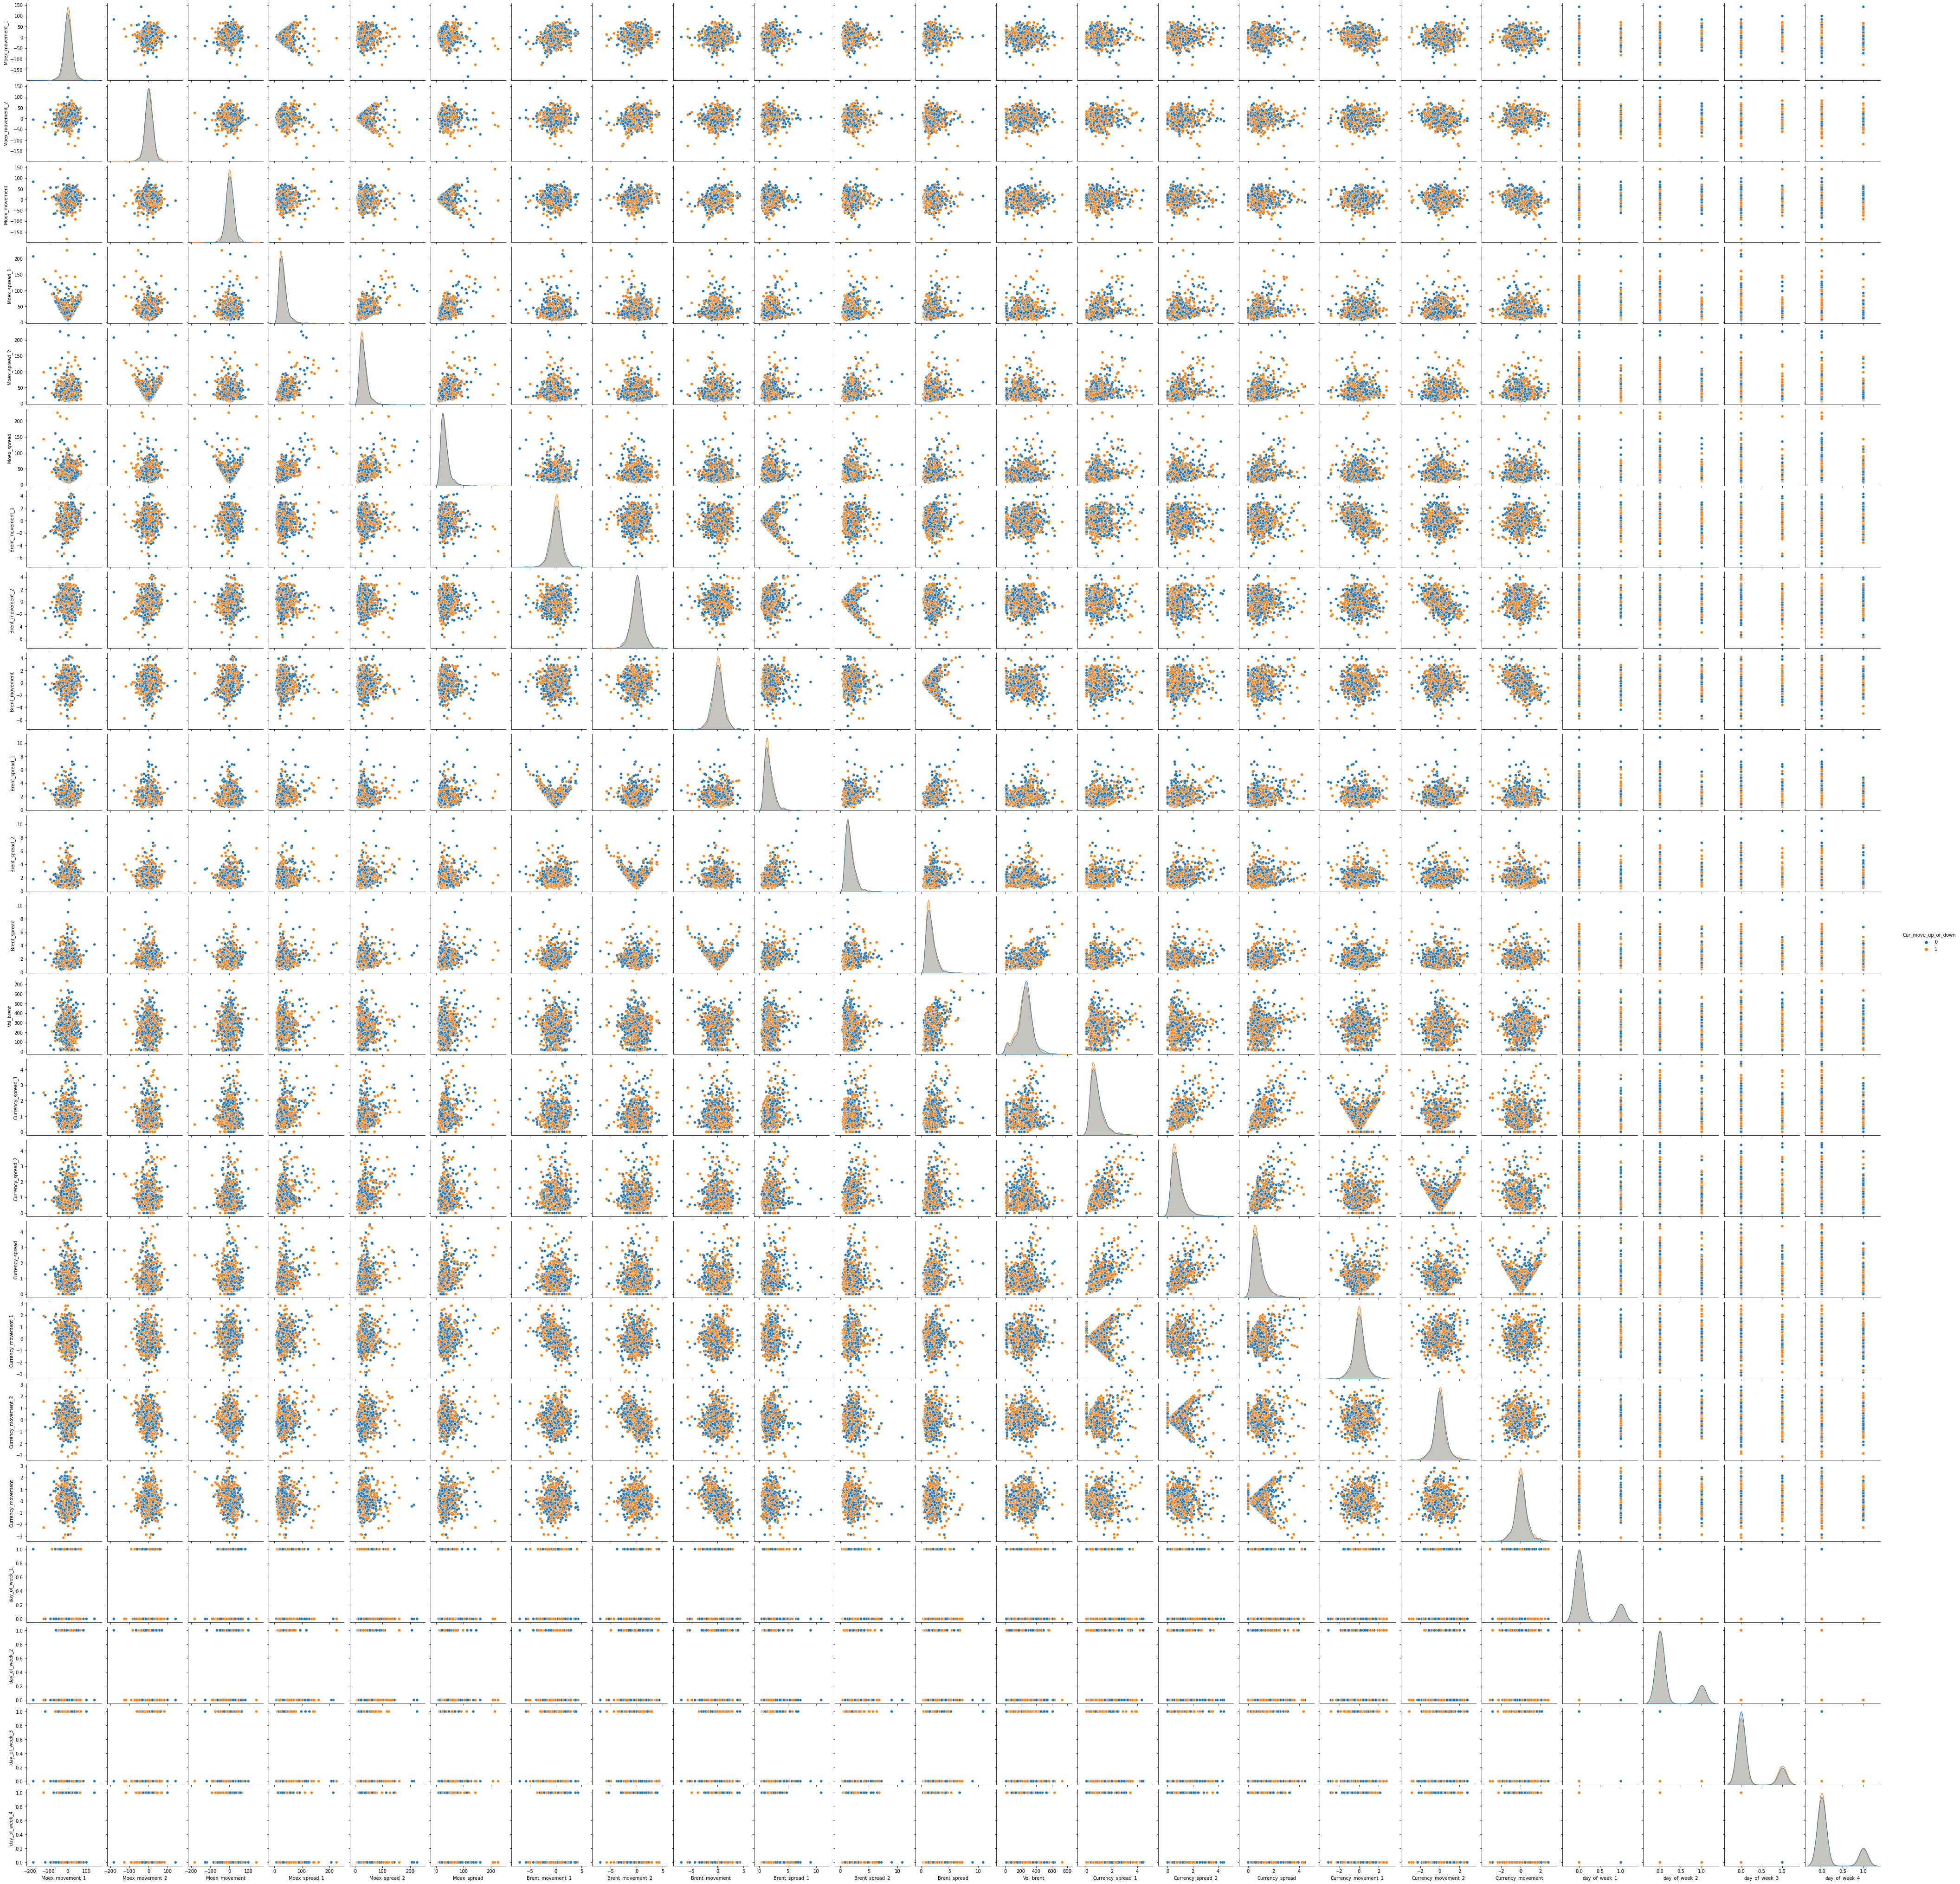

In [71]:
sns.pairplot(data=data_for_classification, hue='Cur_move_up_or_down')

In [72]:
# Разбиваем на тренировочную и тестовую выборки

XC_train, XC_test, yc_train, yc_test = train_test_split(
    data_for_classification.drop(['Cur_move_up_or_down'], axis=1), 
    data_for_classification['Cur_move_up_or_down'], 
    test_size=0.30, 
    random_state=42
)

XC_train.shape, XC_test.shape, yc_train.shape, yc_test.shape

((1075, 23), (461, 23), (1075,), (461,))

In [73]:
# Нормируем данные
# Объявили скалировщик!
scaler_class = StandardScaler()

# Учим скалировщик скалировать все переменны на трэйне
scaler_class.fit(XC_train[['Moex_movement_1', 'Moex_movement_2', 'Moex_movement', 'Moex_spread_1', 'Moex_spread_2', 'Moex_spread', 'Brent_movement_1', 'Brent_movement_2', 'Brent_movement',
                    'Brent_spread_1', 'Brent_spread_2', 'Brent_spread', 'Vol_brent', 'Currency_spread_1', 'Currency_spread_2', 'Currency_spread', 'Currency_movement_1', 'Currency_movement_2', 'Currency_movement']])

# Применяем скалировщик к трэйну
df_train_scale = scaler_class.transform(XC_train[['Moex_movement_1', 'Moex_movement_2', 'Moex_movement', 'Moex_spread_1', 'Moex_spread_2', 'Moex_spread', 'Brent_movement_1', 'Brent_movement_2', 'Brent_movement',
                                           'Brent_spread_1', 'Brent_spread_2', 'Brent_spread', 'Vol_brent', 'Currency_spread_1', 'Currency_spread_2', 'Currency_spread', 'Currency_movement_1', 'Currency_movement_2', 'Currency_movement']])

# Применяем скалирвощик к тесту
df_test_scale = scaler_class.transform(XC_test[['Moex_movement_1', 'Moex_movement_2', 'Moex_movement', 'Moex_spread_1', 'Moex_spread_2', 'Moex_spread', 'Brent_movement_1', 'Brent_movement_2', 'Brent_movement',
                                         'Brent_spread_1', 'Brent_spread_2', 'Brent_spread', 'Vol_brent', 'Currency_spread_1', 'Currency_spread_2', 'Currency_spread', 'Currency_movement_1', 'Currency_movement_2', 'Currency_movement']])

# Заменяем значения на отскалированные
XC_train[['Moex_movement_1', 'Moex_movement_2', 'Moex_movement', 'Moex_spread_1', 'Moex_spread_2', 'Moex_spread', 'Brent_movement_1', 'Brent_movement_2', 'Brent_movement', 'Brent_spread_1',
         'Brent_spread_2', 'Brent_spread', 'Vol_brent', 'Currency_spread_1', 'Currency_spread_2', 'Currency_spread', 'Currency_movement_1', 'Currency_movement_2', 'Currency_movement']] = df_train_scale
XC_test[['Moex_movement_1', 'Moex_movement_2', 'Moex_movement', 'Moex_spread_1', 'Moex_spread_2', 'Moex_spread', 'Brent_movement_1', 'Brent_movement_2', 'Brent_movement', 'Brent_spread_1',
        'Brent_spread_2', 'Brent_spread', 'Vol_brent', 'Currency_spread_1', 'Currency_spread_2', 'Currency_spread', 'Currency_movement_1', 'Currency_movement_2', 'Currency_movement']] = df_test_scale

Применяем алгоритм ближайших соседей (kNN).

In [74]:
from sklearn.neighbors import KNeighborsClassifier


In [75]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(XC_train, yc_train)
y_pred = knn.predict(XC_test)


In [76]:
from sklearn.metrics import classification_report

print(classification_report(yc_test, y_pred))


              precision    recall  f1-score   support

           0       0.54      0.62      0.58       246
           1       0.48      0.40      0.44       215

    accuracy                           0.52       461
   macro avg       0.51      0.51      0.51       461
weighted avg       0.51      0.52      0.51       461



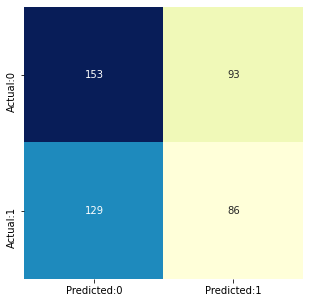

In [77]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(yc_test, y_pred)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

Данная модель предсказать не может.

Попробуем применить логистическую регрессию.

In [78]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(XC_train, yc_train)

y_pred_logres = log_reg.predict(XC_test)

In [79]:
print(classification_report(yc_test, y_pred_logres))

              precision    recall  f1-score   support

           0       0.56      0.38      0.45       246
           1       0.48      0.66      0.56       215

    accuracy                           0.51       461
   macro avg       0.52      0.52      0.50       461
weighted avg       0.52      0.51      0.50       461



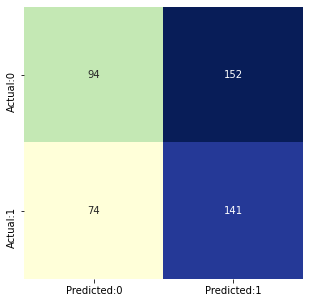

In [80]:
cm = confusion_matrix(yc_test, y_pred_logres)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

Данная модель также не смогла сделать прогноз.

Попробуем применить следующую модель: Метод Опорных Векторов.

In [81]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(XC_train, yc_train)
y_pred_svm = svm_clf.predict(XC_test)

In [82]:
print(classification_report(yc_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.56      0.35      0.43       246
           1       0.48      0.69      0.56       215

    accuracy                           0.51       461
   macro avg       0.52      0.52      0.50       461
weighted avg       0.52      0.51      0.49       461



Эта модель также оказалась бесполезной.

Применим XGBoost.

Подберем параметры вручную.

In [83]:
# Объявляем модель
xgb_c = xgb.XGBClassifier(
    learning_rate=0.5,
    max_depth=50,
    n_estimators=200,
)

In [84]:
# Фитим
xgb_c.fit(XC_train, yc_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:04:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
# Предсказываем
pred_xgb_c = xgb_c.predict(XC_test)

In [86]:
print(classification_report(yc_test, pred_xgb_c))

              precision    recall  f1-score   support

           0       0.62      0.50      0.55       246
           1       0.53      0.65      0.58       215

    accuracy                           0.57       461
   macro avg       0.57      0.57      0.57       461
weighted avg       0.58      0.57      0.57       461



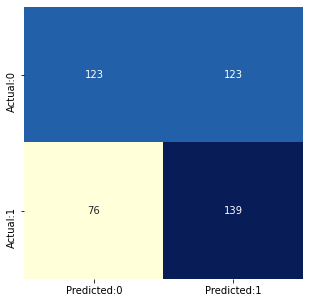

In [87]:
cm = confusion_matrix(yc_test, pred_xgb_c)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

 Сделаем подбор гиперпараметров.

In [88]:
# Решётка для перебора параметра 
param_grid = [
    {'n_estimators': [100, 500, 1000],
     'max_depth': [5, 30, 50],
     'learning_rate': [0.01, 0.1, 0.5]}
]

xgb_сlassifier = xgb.XGBClassifier()
grid_search_сlassifier = GridSearchCV(xgb_сlassifier, param_grid, cv=5, scoring='accuracy', return_train_score=True)

In [89]:
grid_search_сlassifier.fit(XC_train, yc_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:04:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:04:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:05:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:05:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:05:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:05:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:06:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:06:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:07:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:07:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:07:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:07:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:07:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:07:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:08:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[19:08:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [90]:
import joblib

# Сохраним модель с лучшими параметрами для дальнейшего использования
xgb_c_GS = grid_search_сlassifier.best_estimator_
joblib.dump(xgb_c_GS, 'XGB_Classifier.pkl')


['XGB_Classifier.pkl']

In [91]:
# Подгрузим модель

xgb_c_GS_ = joblib.load('XGB_Classifier.pkl')

In [92]:
grid_search_сlassifier.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [93]:
# Пробуем предсказать

pred_best_сlass = xgb_c_GS_.predict(XC_test)

In [94]:
print(classification_report(yc_test, pred_best_сlass))

              precision    recall  f1-score   support

           0       0.58      0.46      0.51       246
           1       0.50      0.61      0.55       215

    accuracy                           0.53       461
   macro avg       0.54      0.54      0.53       461
weighted avg       0.54      0.53      0.53       461



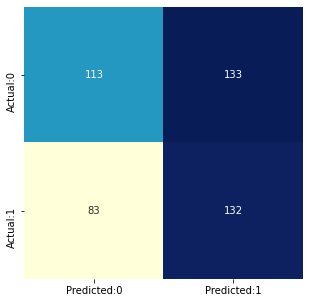

In [95]:
cm = confusion_matrix(yc_test, pred_best_сlass)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

Посмотрим, есть ли важные признаки в данных.

In [96]:
from xgboost import plot_importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

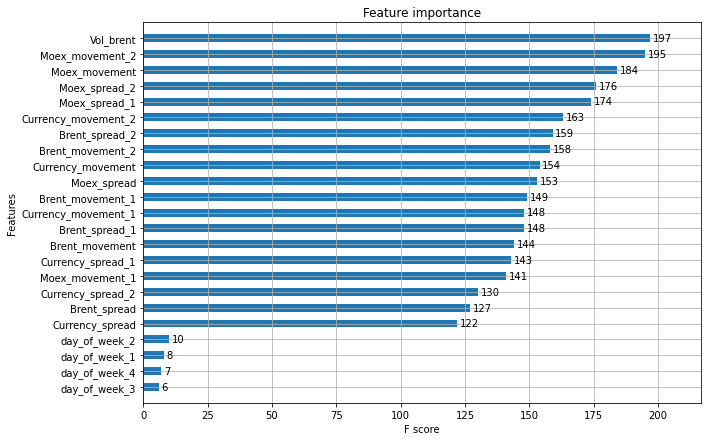

In [97]:
plot_importance(xgb_c, height=0.5) 

# Выводы.

Лучшим алгоритмом на исследуемом наборе данных оказался XGBoost, но качество предсказания не достаточное для его применения в прогнозировании будущего поведения курса валюты.

### Что можно еще сделать.
* Убрать лишние признаки.
* Добавить дополнительные признаки, например, иностранные индексы.
* Добавить еще признаки из прошедших временных периодов, т.е. выше было использовано 3 прошедших периода для прогнозирования будущего движения курса валюты, можно попробовать добавить 5, 7, 10 периодов.